In [1]:
# 01-BU

#Early diagnosis of the autism spectrum disorder in toddlers aged between 12 to 36 months based on the data collection of traits and their medical history  and obtain valuable insights by investigating autism across different variables  such as age, gender, and other factors.


In [2]:
# 02-DU

# Load Dataset

In [3]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ASD_Diagnosis').config("spark.sql.debug.maxToStringFields", 1000).getOrCreate() # Adjust the value as needed
    

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/22 05:40:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
#read in the data. Note that it's in the format of csv.
df = spark.read.csv('ASDdata1.csv',header=True, inferSchema=True)

In [5]:
df.show()

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+----------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+--------------+--------+-------------------+----------------------+----------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Depression|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|     Ethnicity|Jaundice|Family_mem_with_ASD|Who_completed_the_test|ASD_traits|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+----------+-------------------------------------------

In [6]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who_completed_the_test',
 'ASD_traits']

In [7]:
df.describe().toPandas().transpose()

0                   1  \
summary                                             count                mean   
CASE_NO                                              2000              1000.5   
A1                                                   2000              0.3025   
A2                                                   2000              0.2415   
A3                                                   2000              0.2135   
A4                                                   2000               0.274   
A5                                                   2000              0.2795   
A6                                                   2000               0.308   
A7                                                   2000               0.347   
A8                                                   2000              0.2445   
A9                                                   2000              0.2615   
A10                                                  2000              0.4465   
Social_Responsiveness_Scale                          1991  3.1099949773982924   
Age_Months                                           2000   27.86743371685843   
Qchat_10_Score                                       1961   4.240693523712392   
Speech Delay/Language Disorder                       2000                None   
Learning disorder                                    2000                None   
Genetic_Disorders                                    2000                None   
Depression                                           1999                None   
Global developmental delay/intellectual disability   2000                None   
Social/Behavioural Issues                            1986                None   
Childhood Autism Rating Scale                        2000               1.705   
Anxiety_disorder                                     2000                None   
Sex                                                  2000                None   
Ethnicity                                            2000                None   
Jaundice                                             2000                None   
Family_mem_with_ASD                                  2000                None   
Who_completed_the_test                               2000                None   
ASD_traits                                           2000                None   

                                                                      2  \
summary                                                          stddev   
CASE_NO                                               577.4945887192364   
A1                                                  0.45945543815458895   
A2                                                   0.4280997368515263   
A3                                                   0.4098801664821533   
A4                                                  0.44612051259259283   
A5                                                   0.4488657819940419   
A6                                                  0.46178200626557064   
A7                                                    0.476134804625841   
A8                                                   0.4298978437699344   
A9                                                    0.439561551069459   
A10                                                 0.49725383929170935   
Social_Responsiveness_Scale                           3.695638547170374   
Age_Months                                             8.06783892950747   
Qchat_10_Score                                       2.8997178484142405   
Speech Delay/Language Disorder                                     None   
Learning disorder                                                  None   
Genetic_Disorders                                                  None   
Depression                                                         None   
Global developmental delay/intellectual disability                 None   
Social/Behavioural Issues                         

In [8]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who_completed_the_test',
 'ASD_traits']

In [9]:
df.describe().show()

+-------+-----------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+-----------------+------------------+-----------------+-------------------+---------------------------+-----------------+------------------+------------------------------+-----------------+-----------------+----------+--------------------------------------------------+-------------------------+-----------------------------+----------------+----+-----------+--------+-------------------+----------------------+----------+
|summary|          CASE_NO|                 A1|                A2|                A3|                 A4|                A5|                 A6|               A7|                A8|               A9|                A10|Social_Responsiveness_Scale|       Age_Months|    Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Depression|Global developmental delay/intellectual disability|Social/Behavioural I

In [10]:
# Show the DataFrame
df.show()
df.printSchema()

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+----------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+--------------+--------+-------------------+----------------------+----------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Depression|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|     Ethnicity|Jaundice|Family_mem_with_ASD|Who_completed_the_test|ASD_traits|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+----------+-------------------------------------------

In [11]:
df.head()

Row(CASE_NO=1, A1=0, A2=0, A3=0, A4=0, A5=0, A6=0, A7=1, A8=1, A9=0, A10=1, Social_Responsiveness_Scale=3, Age_Months='36', Qchat_10_Score=3, Speech Delay/Language Disorder='Yes', Learning disorder='Yes', Genetic_Disorders='Yes', Depression='Yes', Global developmental delay/intellectual disability='Yes', Social/Behavioural Issues='Yes', Childhood Autism Rating Scale=1, Anxiety_disorder='Yes', Sex='F', Ethnicity='middle eastern', Jaundice='Yes', Family_mem_with_ASD='No', Who_completed_the_test='Family Member', ASD_traits='No')

In [12]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'string'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'string'),
 ('Learning disorder', 'string'),
 ('Genetic_Disorders', 'string'),
 ('Depression', 'string'),
 ('Global developmental delay/intellectual disability', 'string'),
 ('Social/Behavioural Issues', 'string'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'string'),
 ('Sex', 'string'),
 ('Ethnicity', 'string'),
 ('Jaundice', 'string'),
 ('Family_mem_with_ASD', 'string'),
 ('Who_completed_the_test', 'string'),
 ('ASD_traits', 'string')]

In [13]:
df.describe

<bound method DataFrame.describe of DataFrame[CASE_NO: int, A1: int, A2: int, A3: int, A4: int, A5: int, A6: int, A7: int, A8: int, A9: int, A10: int, Social_Responsiveness_Scale: int, Age_Months: string, Qchat_10_Score: int, Speech Delay/Language Disorder: string, Learning disorder: string, Genetic_Disorders: string, Depression: string, Global developmental delay/intellectual disability: string, Social/Behavioural Issues: string, Childhood Autism Rating Scale: int, Anxiety_disorder: string, Sex: string, Ethnicity: string, Jaundice: string, Family_mem_with_ASD: string, Who_completed_the_test: string, ASD_traits: string]>

In [14]:
display(df)
df.show

DataFrame[CASE_NO: int, A1: int, A2: int, A3: int, A4: int, A5: int, A6: int, A7: int, A8: int, A9: int, A10: int, Social_Responsiveness_Scale: int, Age_Months: string, Qchat_10_Score: int, Speech Delay/Language Disorder: string, Learning disorder: string, Genetic_Disorders: string, Depression: string, Global developmental delay/intellectual disability: string, Social/Behavioural Issues: string, Childhood Autism Rating Scale: int, Anxiety_disorder: string, Sex: string, Ethnicity: string, Jaundice: string, Family_mem_with_ASD: string, Who_completed_the_test: string, ASD_traits: string]

<bound method DataFrame.show of DataFrame[CASE_NO: int, A1: int, A2: int, A3: int, A4: int, A5: int, A6: int, A7: int, A8: int, A9: int, A10: int, Social_Responsiveness_Scale: int, Age_Months: string, Qchat_10_Score: int, Speech Delay/Language Disorder: string, Learning disorder: string, Genetic_Disorders: string, Depression: string, Global developmental delay/intellectual disability: string, Social/Behavioural Issues: string, Childhood Autism Rating Scale: int, Anxiety_disorder: string, Sex: string, Ethnicity: string, Jaundice: string, Family_mem_with_ASD: string, Who_completed_the_test: string, ASD_traits: string]>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('ASDdata1.csv')
print(df)
df.head()



      CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1995     1996   1   1   0   1   0   0   0   0   0  ...   
1996     1997   1   1   0   0   0   0   0   0   0  ...   
1997     1998   1   1   0   0   1   1   0   1   1  ...   
1998     1999   1   1   1   1   1   1   1   1   1  ...   
1999     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                   Yes    
1                                                   Yes    
2                                                   Yes    
3                                                   Yes    
4  

CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0        1   0   0   0   0   0   0   1   1   0  ...   
1        2   1   1   0   0   0   1   1   0   0  ...   
2        3   1   0   0   0   0   0   1   1   0  ...   
3        4   1   1   1   1   1   1   1   1   1  ...   
4        5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues Childhood Autism Rating Scale  Anxiety_disorder  \
0                        Yes                             1               Yes   
1                        Yes                             2               Yes   
2                        Yes                             4               Yes   
3                        Yes                             2               Yes   
4                        Yes                             1               Yes   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   F  middle eastern      Yes                  No          Family Member   
1   M  White European      Yes                  No          Family Member   
2   M  Middle Eastern      Yes                  No          Family Member   
3   M        Hispanic       No                  No          Family Member   
4   F  White European       No                  No          Family Member   

  ASD_traits  
0         No  
1        Yes  
2        Yes  
3        Yes  
4        Yes  

[5 rows x 28 columns]

In [17]:
df.shape


(2000, 28)

In [18]:
df.columns


Index(['CASE_NO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Months', 'Qchat_10_Score',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [19]:
df.dtypes
df.describe
df['Age_Months'].describe()
df['Age_Months'].value_counts()

36    599
12    132
30    125
24    120
33     83
28     75
26     69
34     65
32     62
15     58
23     56
35     55
22     54
31     54
25     50
20     45
27     45
29     43
19     40
13     38
18     33
14     28
17     25
21     24
16     17
?       1
0       1
1       1
40      1
63      1
Name: Age_Months, dtype: int64

In [20]:
df.dtypes


CASE_NO                                                 int64
A1                                                      int64
A2                                                      int64
A3                                                      int64
A4                                                      int64
A5                                                      int64
A6                                                      int64
A7                                                      int64
A8                                                      int64
A9                                                      int64
A10                                                     int64
Social_Responsiveness_Scale                           float64
Age_Months                                             object
Qchat_10_Score                                        float64
Speech Delay/Language Disorder                         object
Learning disorder                                      object
Genetic_

In [21]:
df.describe


<bound method NDFrame.describe of       CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1995     1996   1   1   0   1   0   0   0   0   0  ...   
1996     1997   1   1   0   0   0   0   0   0   0  ...   
1997     1998   1   1   0   0   1   1   0   1   1  ...   
1998     1999   1   1   1   1   1   1   1   1   1  ...   
1999     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                   Yes    
1                                                   Yes    
2                                                   Yes    
3                            

In [22]:
df['Age_Months'].describe()


count     2000
unique      30
top         36
freq       599
Name: Age_Months, dtype: object

In [23]:
df['Age_Months'].value_counts()

36    599
12    132
30    125
24    120
33     83
28     75
26     69
34     65
32     62
15     58
23     56
35     55
22     54
31     54
25     50
20     45
27     45
29     43
19     40
13     38
18     33
14     28
17     25
21     24
16     17
?       1
0       1
1       1
40      1
63      1
Name: Age_Months, dtype: int64

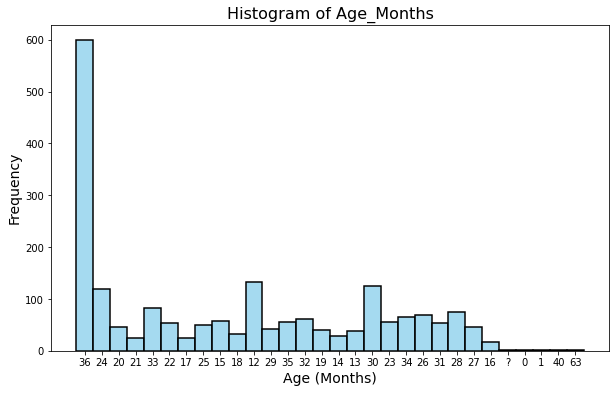

In [24]:
# Visualizing 'Age_Months' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_Months'], bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Histogram of Age_Months', fontsize=16)
plt.xlabel('Age (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [25]:
df.shape

(2000, 28)

In [26]:
df.columns

Index(['CASE_NO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Months', 'Qchat_10_Score',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [27]:
df.head()

CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0        1   0   0   0   0   0   0   1   1   0  ...   
1        2   1   1   0   0   0   1   1   0   0  ...   
2        3   1   0   0   0   0   0   1   1   0  ...   
3        4   1   1   1   1   1   1   1   1   1  ...   
4        5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues Childhood Autism Rating Scale  Anxiety_disorder  \
0                        Yes                             1               Yes   
1                        Yes                             2               Yes   
2                        Yes                             4               Yes   
3                        Yes                             2               Yes   
4                        Yes                             1               Yes   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   F  middle eastern      Yes                  No          Family Member   
1   M  White European      Yes                  No          Family Member   
2   M  Middle Eastern      Yes                  No          Family Member   
3   M        Hispanic       No                  No          Family Member   
4   F  White European       No                  No          Family Member   

  ASD_traits  
0         No  
1        Yes  
2        Yes  
3        Yes  
4        Yes  

[5 rows x 28 columns]

In [28]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO                                             2000 non-null   int64  
 1   A1                                                  2000 non-null   int64  
 2   A2                                                  2000 non-null   int64  
 3   A3                                                  2000 non-null   int64  
 4   A4                                                  2000 non-null   int64  
 5   A5                                                  2000 non-null   int64  
 6   A6                                                  2000 non-null   int64  
 7   A7                                                  2000 non-null   int64  
 8   A8                                                  2000 non-null   int64  
 9

In [29]:
print(df.describe())

           CASE_NO           A1         A2          A3           A4  \
count  2000.000000  2000.000000  2000.0000  2000.00000  2000.000000   
mean   1000.500000     0.302500     0.2415     0.21350     0.274000   
std     577.494589     0.459455     0.4281     0.40988     0.446121   
min       1.000000     0.000000     0.0000     0.00000     0.000000   
25%     500.750000     0.000000     0.0000     0.00000     0.000000   
50%    1000.500000     0.000000     0.0000     0.00000     0.000000   
75%    1500.250000     1.000000     0.0000     0.00000     1.000000   
max    2000.000000     1.000000     1.0000     1.00000     1.000000   

                A5           A6           A7           A8           A9  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.279500     0.308000     0.347000     0.244500     0.261500   
std       0.448866     0.461782     0.476135     0.429898     0.439562   
min       0.000000     0.000000     0.000000     0.000000     0.

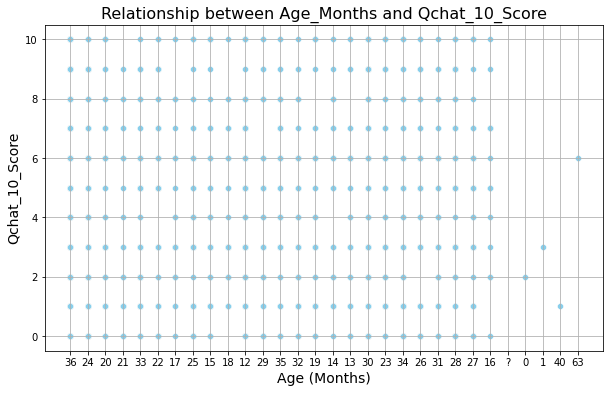

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the relationship between Age_Months and Qchat_10_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_Months', y='Qchat_10_Score', color='skyblue')
plt.title('Relationship between Age_Months and Qchat_10_Score', fontsize=16)
plt.xlabel('Age (Months)', fontsize=14)
plt.ylabel('Qchat_10_Score', fontsize=14)
plt.grid(True)
plt.show()

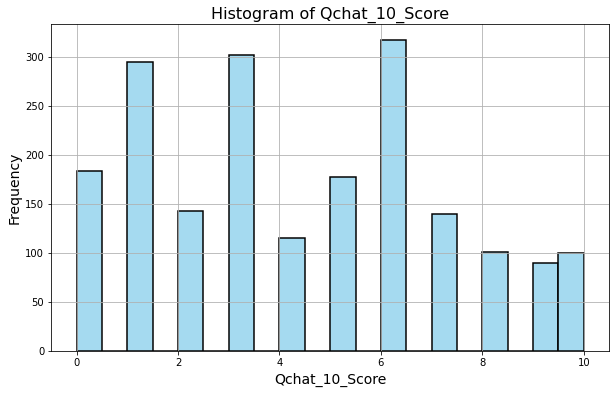

In [31]:
# Visualizing the distribution of Qchat_10_Score using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Qchat_10_Score'], bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Histogram of Qchat_10_Score', fontsize=16)
plt.xlabel('Qchat_10_Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

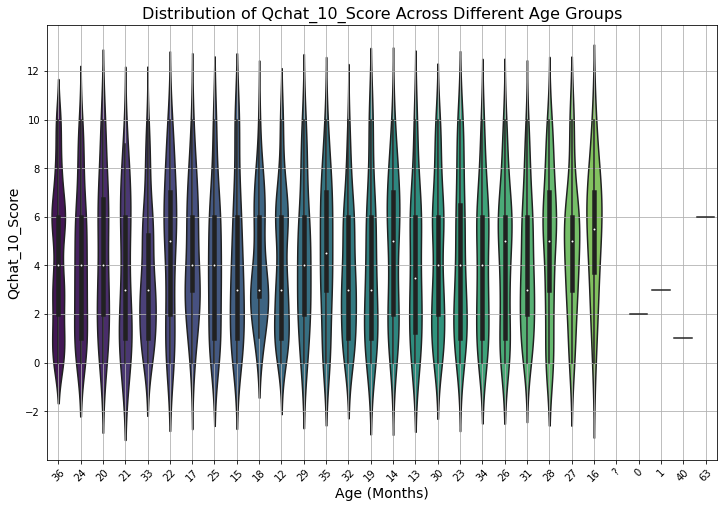

In [32]:
# Create a violin plot to visualize the distribution of 'Qchat_10_Score' across different age groups
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Age_Months', y='Qchat_10_Score', palette='viridis')
plt.title('Distribution of Qchat_10_Score Across Different Age Groups', fontsize=16)
plt.xlabel('Age (Months)', fontsize=14)
plt.ylabel('Qchat_10_Score', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

/tmp/ipykernel_1213/1009208244.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[column] = df_subset[column].map({'Yes': 1, 'No': 0})
/tmp/ipykernel_1213/1009208244.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(inplace=True)


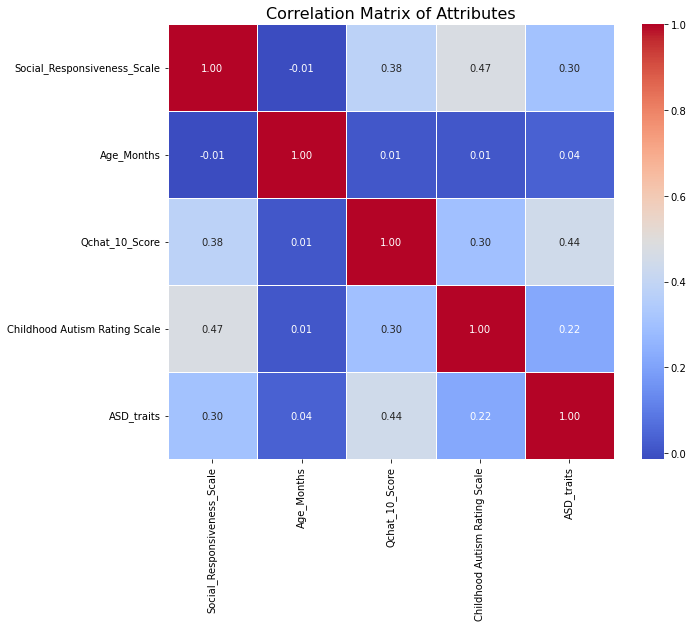

Correlation Coefficients:
                               Social_Responsiveness_Scale  Age_Months  \
Social_Responsiveness_Scale                       1.000000   -0.014843   
Age_Months                                       -0.014843    1.000000   
Qchat_10_Score                                    0.380981    0.009288   
Childhood Autism Rating Scale                     0.474628    0.011865   
ASD_traits                                        0.303001    0.036397   

                               Qchat_10_Score  Childhood Autism Rating Scale  \
Social_Responsiveness_Scale          0.380981                       0.474628   
Age_Months                           0.009288                       0.011865   
Qchat_10_Score                       1.000000                       0.298190   
Childhood Autism Rating Scale        0.298190                       1.000000   
ASD_traits                           0.441693                       0.215314   

                               ASD_traits  
Soci

In [33]:
# Select relevant columns for correlation analysis
columns_of_interest = ['Social_Responsiveness_Scale', 'Age_Months','Qchat_10_Score', 'Childhood Autism Rating Scale', 'ASD_traits']

# Extract the relevant columns from the DataFrame
df_subset = df[columns_of_interest]

# Map 'Yes' and 'No' to 1 and 0 respectively for binary columns
binary_columns = ['ASD_traits']  # Add other binary columns if necessary
for column in binary_columns:
    df_subset[column] = df_subset[column].map({'Yes': 1, 'No': 0})

# Drop rows with missing values
df_subset.dropna(inplace=True)

# Convert columns to numeric
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Attributes', fontsize=16)
plt.show()

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)


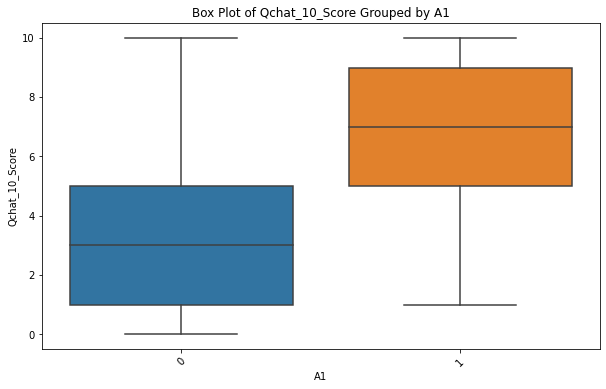

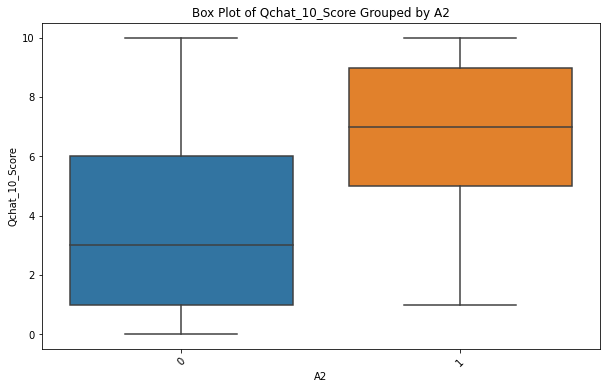

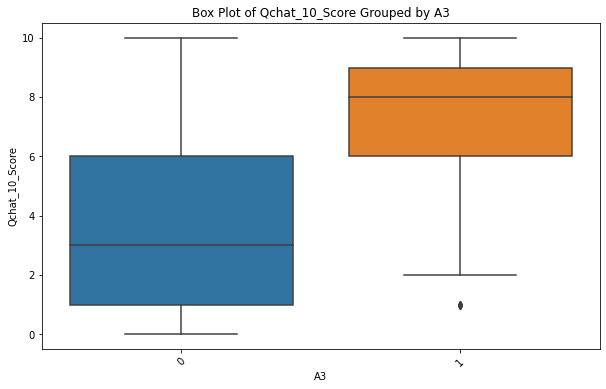

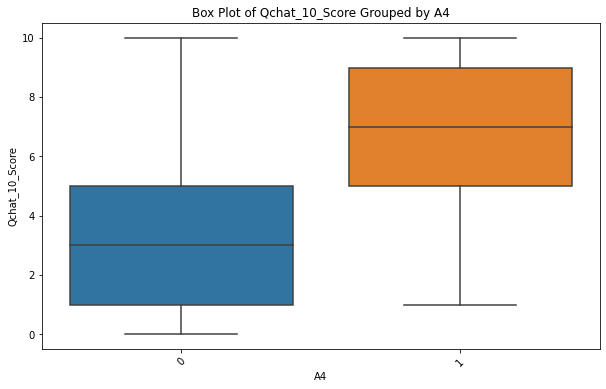

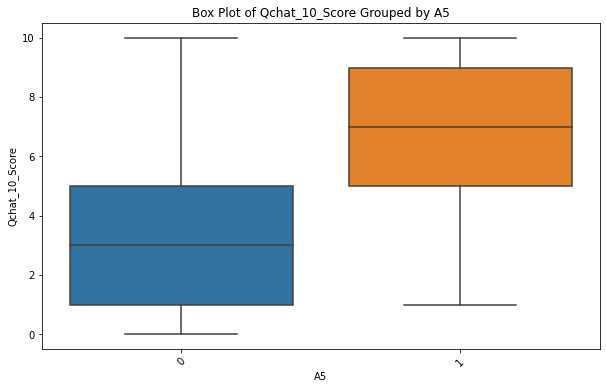

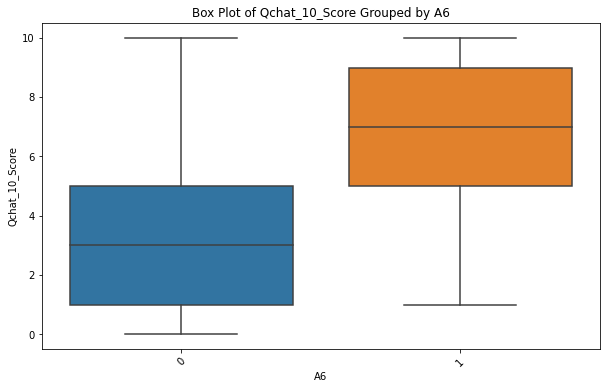

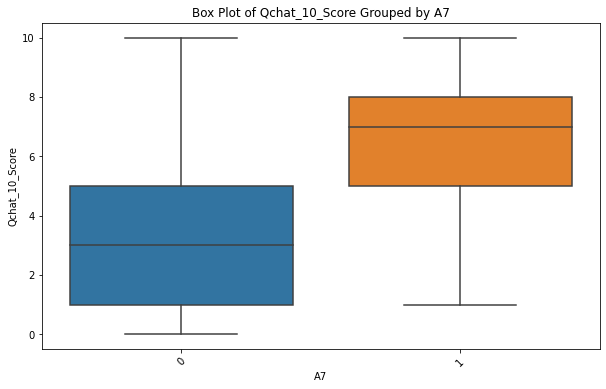

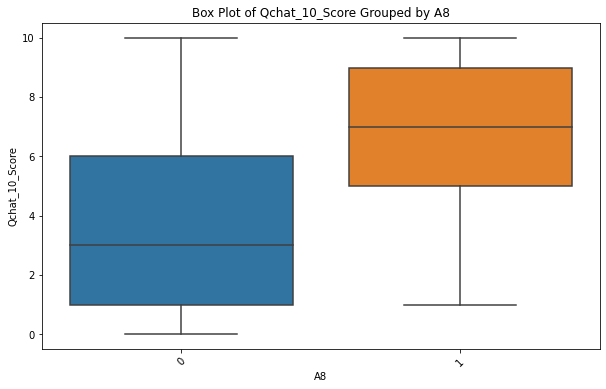

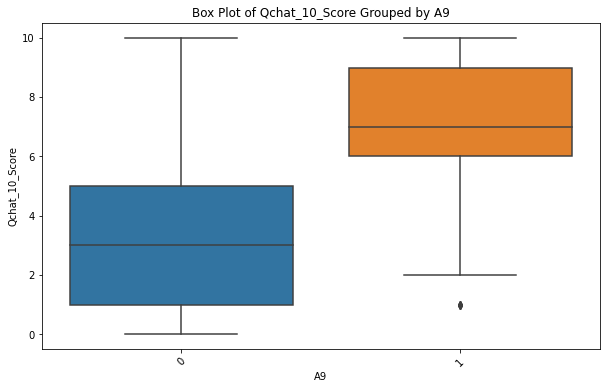

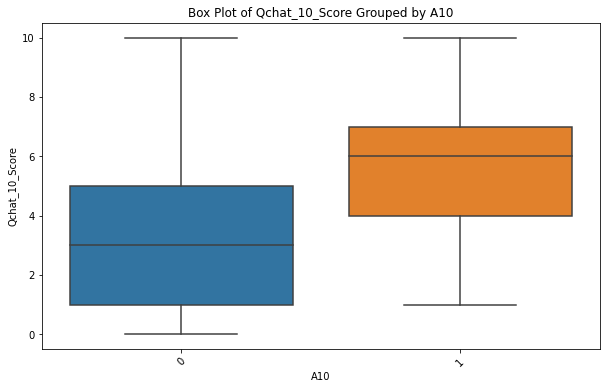

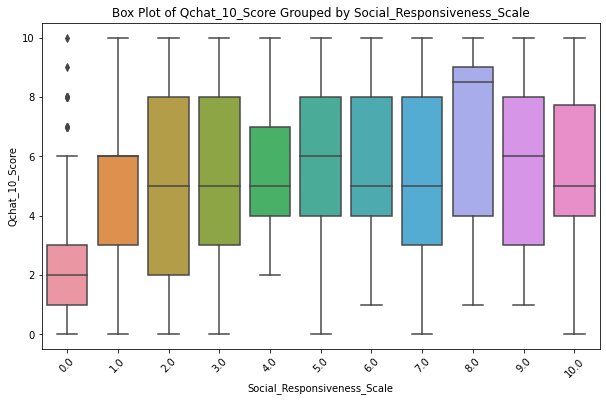

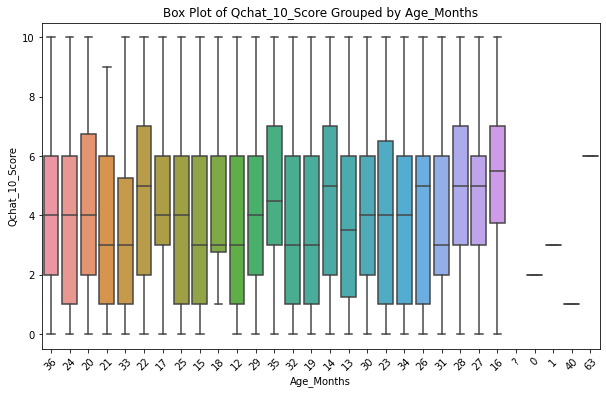

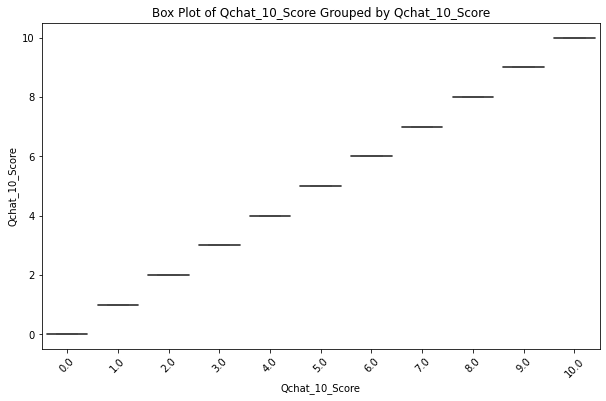

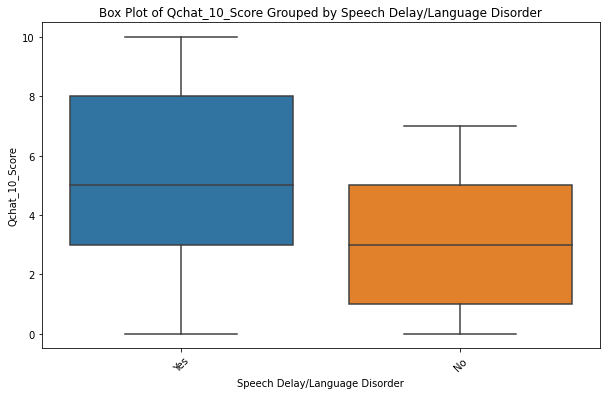

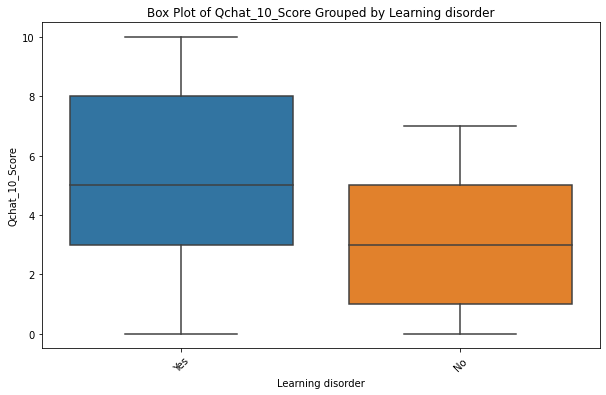

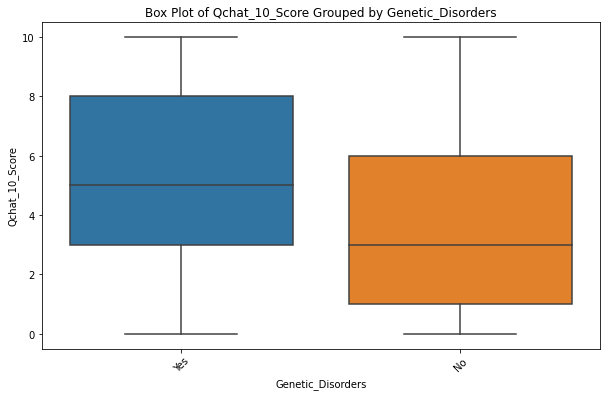

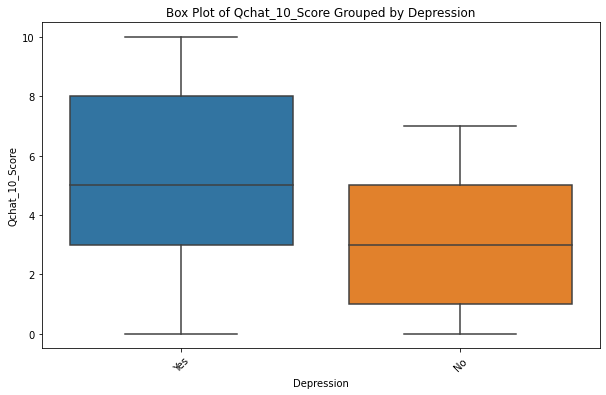

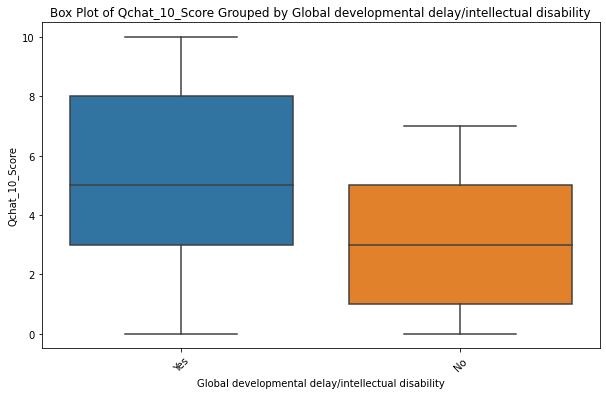

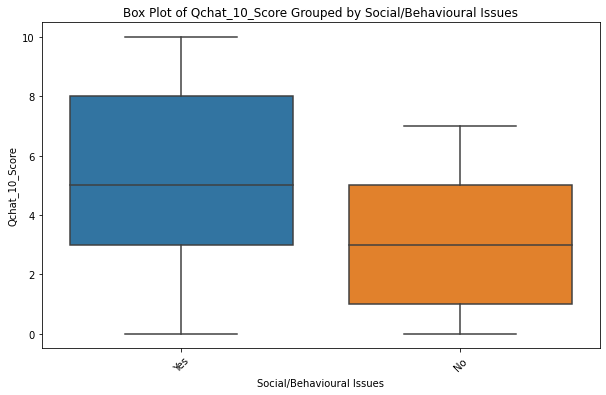

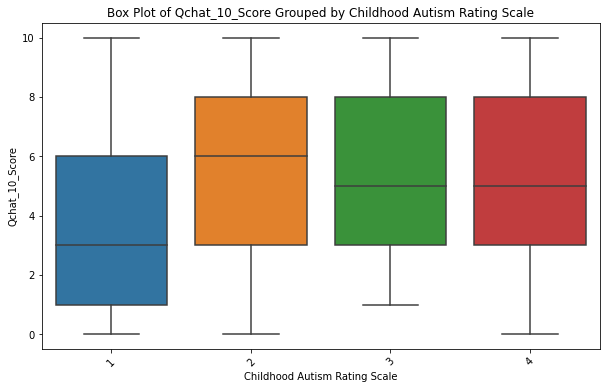

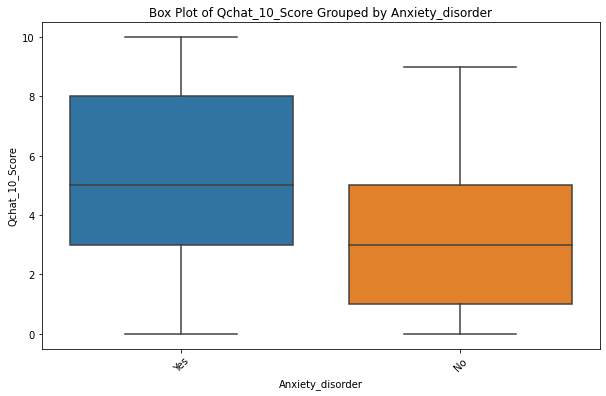

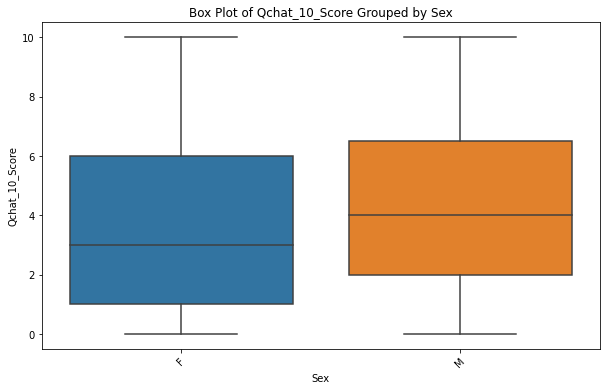

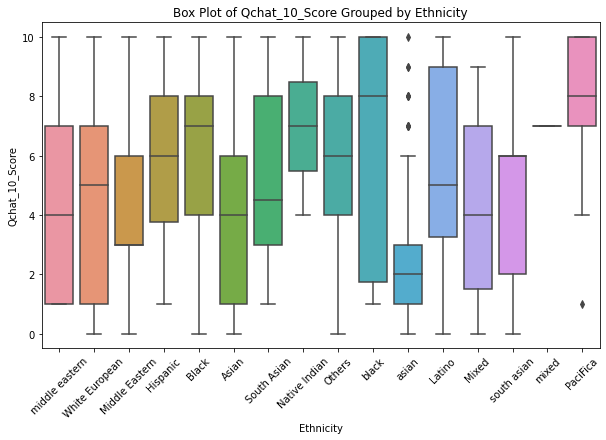

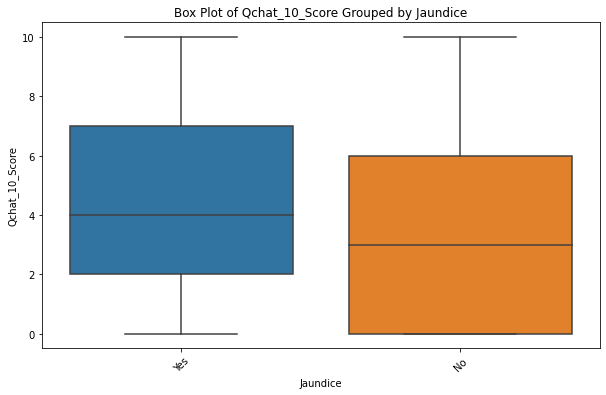

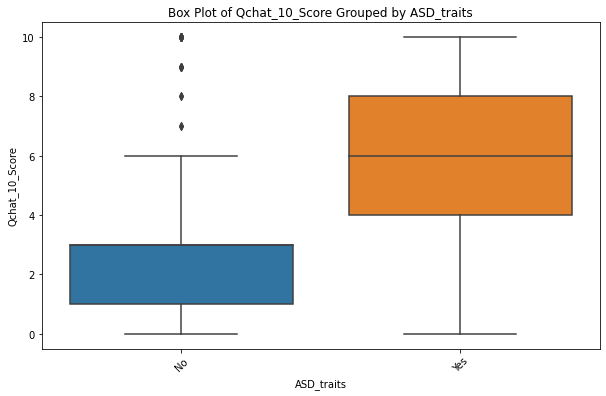

In [34]:
# Select categorical columns for grouping
categorical_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10', 'Social_Responsiveness_Scale', 'Age_Months',
       'Qchat_10_Score', 'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice', 'ASD_traits']  

# Plot box plots for numerical variables grouped by a categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Qchat_10_Score', data=df)
    plt.title(f'Box Plot of Qchat_10_Score Grouped by {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()
 

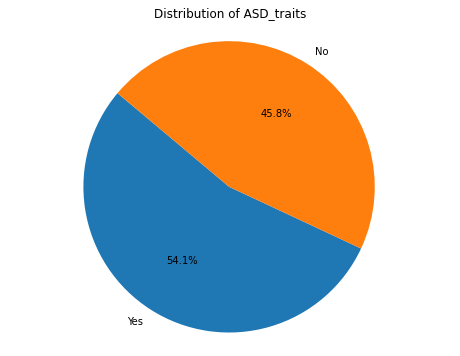

In [35]:
# Calculate the frequency of each category in 'ASD_traits'
asdt_counts = df['ASD_traits'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(asdt_counts, labels=asdt_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of ASD_traits')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [36]:
# Check for missing values in each column
missing_values = df.isna()
print(missing_values[missing_values > 0])
missing_values = df.isna().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


     CASE_NO   A1   A2   A3   A4   A5   A6   A7   A8   A9  ...  \
0        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
3        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1995     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1996     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1997     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1998     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1999     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

     Global developmental delay/intellectual disability  \
0                                                   NaN   
1                                                   NaN   
2                             

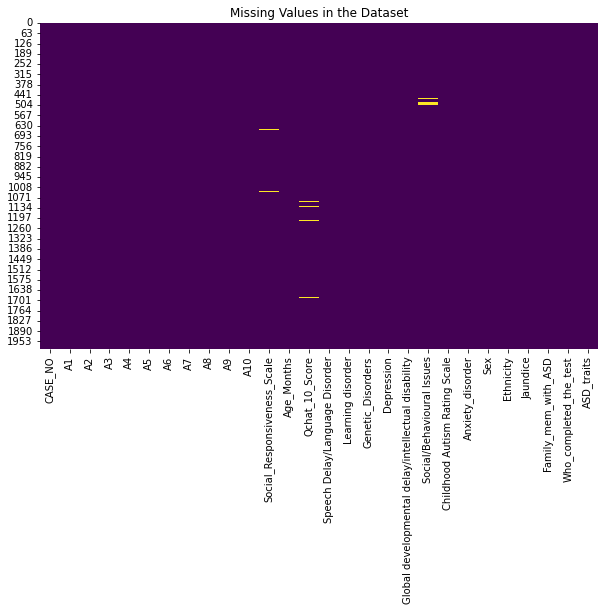

In [37]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

In [38]:
##3. Data Preparation
#3.1 Data Selection


In [39]:
df = spark.read.csv('ASDdata1.csv',header=True, inferSchema=True)

In [40]:
#  Drop irrelevant columns
irrelevant_columns = ['Depression', 'Who_completed_the_test']
df = df.drop(*irrelevant_columns)

In [41]:
# Save the modified DataFrame to a new CSV file
df.write.csv('ASD1.csv', header=True, mode='overwrite')

In [42]:
# Explore the DataFrame
# Show the first few rows
df.show(5)

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+--------------+--------+-------------------+----------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|     Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+---------------

In [43]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits']

In [44]:
# Count the number of rows
num_rows = df.count()

# Count the number of columns
num_cols = len(df.columns)

# Print the shape of the DataFrame
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (2000, 26)


In [45]:
##3.2 Cleaning Data

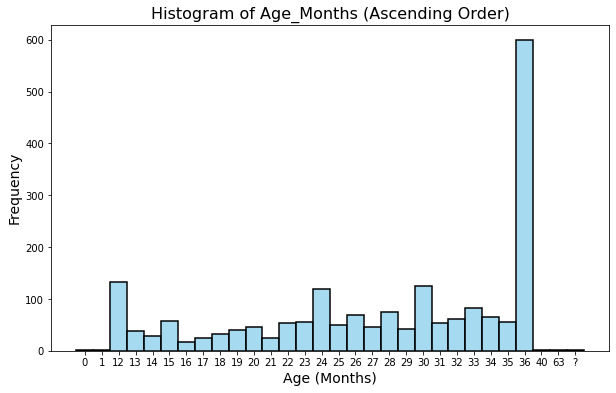

In [46]:
# Define the selected columns you want to check for outliers
selected_columns = ['ASD_traits', 'Social_Responsiveness_Scale', 'Age_Months']

# Select the relevant columns from the DataFrame
df_selected = df.select(selected_columns)

# Convert the DataFrame to Pandas for visualization
df_pandas = df_selected.toPandas()

# Sort the 'Age_Months' column in ascending order
sorted_age_months = df_pandas['Age_Months'].sort_values()

# Plot histogram of 'Age_Months' column
plt.figure(figsize=(10, 6))
sns.histplot(sorted_age_months, bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Histogram of Age_Months (Ascending Order)', fontsize=16)
plt.xlabel('Age (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [47]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

# Define the object-type column with outliers
object_column = 'Age_Months'

# Calculate frequency counts of unique values in the column
value_counts = df.groupBy(object_column).count()

# Define a threshold for minimum frequency count
threshold = 10

# Filter out categories with frequency counts below the threshold
outliers = value_counts.filter(value_counts['count'] < threshold).select(object_column).rdd.flatMap(lambda x: x).collect()
df_filtered = df.filter(~col(object_column).isin(outliers))


In [48]:
# Save the filtered dataset without outlier categories
output_path = 'dataset_without_outliers.csv'
df_filtered.write.csv(output_path, header=True, mode='overwrite')

# Show the shape of the filtered DataFrame
print("Shape:", (df_filtered.count(), len(df_filtered.columns)))


Shape: (1995, 26)


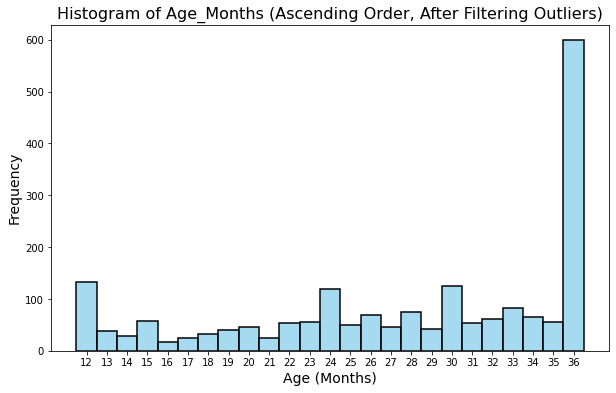

In [49]:
# Assuming df is your PySpark DataFrame containing 'Age_Months' column

# Define the object-type column with outliers
object_column = 'Age_Months'

# Calculate frequency counts of unique values in the column
value_counts = df.groupBy(object_column).count()

# Define a threshold for minimum frequency count
threshold = 10

# Filter out categories with frequency counts below the threshold
outliers = value_counts.filter(value_counts['count'] < threshold).select(object_column).rdd.flatMap(lambda x: x).collect()
df_filtered = df.filter(~col(object_column).isin(outliers))

# Sort the filtered DataFrame by 'Age_Months' column in ascending order
df_sorted = df_filtered.orderBy(object_column)

# Convert the sorted DataFrame to Pandas for visualization
df_sorted_pd = df_sorted.select(object_column).toPandas()

# Plot histogram of 'Age_Months' column after filtering outliers and sorting in ascending order
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted_pd[object_column], bins=20, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Histogram of Age_Months (Ascending Order, After Filtering Outliers)', fontsize=16)
plt.xlabel('Age (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [50]:
# Remove rows with missing values
df = df.dropna()

# Show the first few rows of the cleaned DataFrame
df.show()


+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+--------------+--------+-------------------+----------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|     Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+---------------

In [51]:
# Count the number of rows
num_rows = df.count()

# Count the number of columns
num_cols = len(df.columns)

# Print the shape of the DataFrame
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (1938, 26)


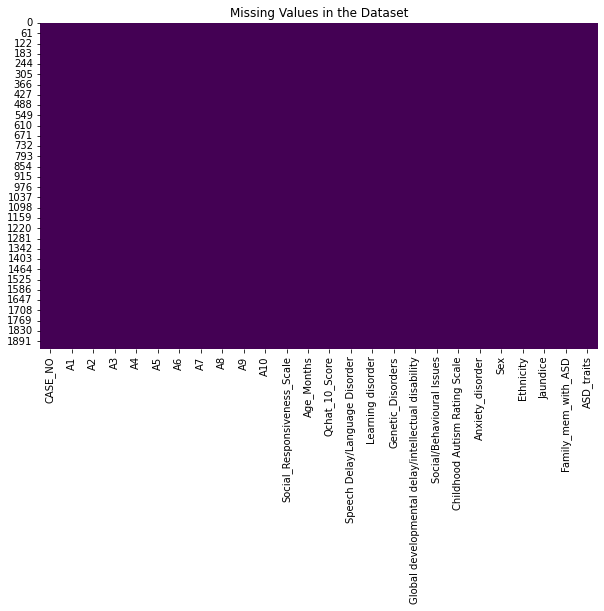

In [52]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_pd.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in the Dataset')
plt.show()

In [53]:
# Additional information about the DataFrame
print("Head of DataFrame:")
print(df_pd.head())

Head of DataFrame:
   CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  Genetic_Disorders  \
0        1   0   0   0   0   0   0   1   1   0  ...                Yes   
1        2   1   1   0   0   0   1   1   0   0  ...                Yes   
2        3   1   0   0   0   0   0   1   1   0  ...                Yes   
3        4   1   1   1   1   1   1   1   1   1  ...                 No   
4        5   1   1   0   1   1   1   1   1   1  ...                 No   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

  Social/Behavioural Issues  Childhood Autism Rating Scale Anxiety_disorder  \
0                       Yes                              1              Yes   
1                       Yes        

In [54]:
df.head()


Row(CASE_NO=1, A1=0, A2=0, A3=0, A4=0, A5=0, A6=0, A7=1, A8=1, A9=0, A10=1, Social_Responsiveness_Scale=3, Age_Months='36', Qchat_10_Score=3, Speech Delay/Language Disorder='Yes', Learning disorder='Yes', Genetic_Disorders='Yes', Global developmental delay/intellectual disability='Yes', Social/Behavioural Issues='Yes', Childhood Autism Rating Scale=1, Anxiety_disorder='Yes', Sex='F', Ethnicity='middle eastern', Jaundice='Yes', Family_mem_with_ASD='No', ASD_traits='No')

In [55]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'string'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'string'),
 ('Learning disorder', 'string'),
 ('Genetic_Disorders', 'string'),
 ('Global developmental delay/intellectual disability', 'string'),
 ('Social/Behavioural Issues', 'string'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'string'),
 ('Sex', 'string'),
 ('Ethnicity', 'string'),
 ('Jaundice', 'string'),
 ('Family_mem_with_ASD', 'string'),
 ('ASD_traits', 'string')]

In [56]:
# Count the number of rows
num_rows = df.count()

# Count the number of columns
num_cols = len(df.columns)

# Print the shape of the DataFrame
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (1938, 26)


In [57]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits']

In [58]:
##3.3 Data Construction_Generating records

In [59]:
from pyspark.sql.functions import floor

# Define a function to convert months to years
def months_to_years(months):
    return months // 12  # Use floor division to get the integer number of years

# Register the function as a UDF (User Defined Function)
spark.udf.register("months_to_years_udf", months_to_years)

# Apply the UDF to create the new column 'Age_Years'
df = df.withColumn("Age_Years", floor(df["Age_Months"]/12))

# Now we have a new column 'Age_Years' representing ages in years

# Save the dataset with the new column
df.write.csv('dataset_with_AgeYears.csv', header=True, mode="overwrite")



In [60]:
# Show the columns of the DataFrame
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Age_Years']

In [61]:
df.head()

Row(CASE_NO=1, A1=0, A2=0, A3=0, A4=0, A5=0, A6=0, A7=1, A8=1, A9=0, A10=1, Social_Responsiveness_Scale=3, Age_Months='36', Qchat_10_Score=3, Speech Delay/Language Disorder='Yes', Learning disorder='Yes', Genetic_Disorders='Yes', Global developmental delay/intellectual disability='Yes', Social/Behavioural Issues='Yes', Childhood Autism Rating Scale=1, Anxiety_disorder='Yes', Sex='F', Ethnicity='middle eastern', Jaundice='Yes', Family_mem_with_ASD='No', ASD_traits='No', Age_Years=3)

In [62]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()

# Display the DataFrame as a table
import IPython.display as display
display.display(pandas_df)

CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1933     1996   1   1   0   1   0   0   0   0   0  ...   
1934     1997   1   1   0   0   0   0   0   0   0  ...   
1935     1998   1   1   0   0   1   1   0   1   1  ...   
1936     1999   1   1   1   1   1   1   1   1   1  ...   
1937     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                   Yes    
1                                                   Yes    
2                                                   Yes    
3                                                   Yes    
4                                                   Yes    
...                                                 ...    
1933                                                Yes    
1934                                                Yes    
1935                                                Yes    
1936                                                Yes    
1937                                                Yes    

      Social/Behavioural Issues Childhood Autism Rating Scale  \
0                           Yes                             1   
1                           Yes                             2   
2                           Yes                             4   
3                           Yes                             2   
4                           Yes                             1   
...                         ...                           ...   
1933                        Yes                             3   
1934                        Yes                             4   
1935                        Yes                             2   
1936                        Yes                             2   
1937                        Yes                             1   

      Anxiety_disorder Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  Yes   F  middle eastern      Yes                  No   
1                  Yes   M  White European      Yes                  No   
2                  Yes   M  Middle Eastern      Yes                  No   
3                  Yes   M        Hispanic       No                  No   
4                  Yes   F  White European       No                  No   
...                ...  ..             ...      ...                 ...   
1933               Yes   M  Middle Eastern      Yes                  No   
1934               Yes   M  Middle Eastern      Yes                  No   
1935               Yes   M  White European      Yes                  No   
1936               Yes   M        PaciFica      Yes                  No   
1937               Yes   M  White European      Yes                 Yes   

     ASD_traits  Age_Years  
0            No          3  
1           Yes          3  
2           Yes          2  
3           Yes          1  
4           Yes          1  
...         ...        ...  
1933         No          1  
1934         No          2  
1935        Yes          2  
1936        Yes          1  
1937        Yes          1  

[1938 rows x 27 columns]

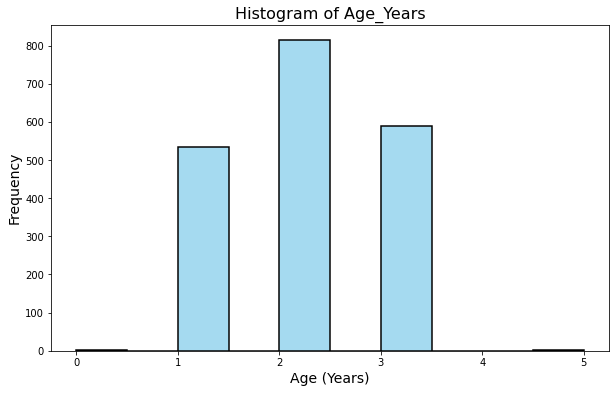

In [63]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['Age_Years'], bins=10, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Histogram of Age_Years', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [64]:
##3.4 Data Integration

In [65]:
# Load the screen time dataset
screen_time_df = spark.read.csv('screentime.csv', header=True, inferSchema=True)

In [66]:
# Merge the datasets on the CASE_NO identifier
merged_df = df.join(screen_time_df, on='CASE_NO', how='inner')

In [67]:
# Save the merged DataFrame to a new CSV file
merged_df.write.csv('merged_dataset.csv', header=True, mode='overwrite')

In [68]:
# Convert to Pandas DataFrame for visualization
pandas_df = merged_df.toPandas()
display.display(pandas_df)

CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1933     1996   1   1   0   1   0   0   0   0   0  ...   
1934     1997   1   1   0   0   0   0   0   0   0  ...   
1935     1998   1   1   0   0   1   1   0   1   1  ...   
1936     1999   1   1   1   1   1   1   1   1   1  ...   
1937     2000   1   1   0   0   0   1   1   1   0  ...   

      Social/Behavioural Issues  Childhood Autism Rating Scale  \
0                           Yes                              1   
1                           Yes                              2   
2                           Yes                              4   
3                           Yes                              2   
4                           Yes                              1   
...                         ...                            ...   
1933                        Yes                              3   
1934                        Yes                              4   
1935                        Yes                              2   
1936                        Yes                              2   
1937                        Yes                              1   

     Anxiety_disorder  Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                 Yes    F  middle eastern      Yes                  No   
1                 Yes    M  White European      Yes                  No   
2                 Yes    M  Middle Eastern      Yes                  No   
3                 Yes    M        Hispanic       No                  No   
4                 Yes    F  White European       No                  No   
...               ...  ...             ...      ...                 ...   
1933              Yes    M  Middle Eastern      Yes                  No   
1934              Yes    M  Middle Eastern      Yes                  No   
1935              Yes    M  White European      Yes                  No   
1936              Yes    M        PaciFica      Yes                  No   
1937              Yes    M  White European      Yes                 Yes   

     ASD_traits Age_Years  Screen_time(hour/day)  
0            No         3                    2.0  
1           Yes         3                    2.0  
2           Yes         2                    2.0  
3           Yes         1                    5.0  
4           Yes         1                    4.5  
...         ...       ...                    ...  
1933         No         1                    4.0  
1934         No         2                    5.0  
1935        Yes         2                    3.0  
1936        Yes         1                    2.0  
1937        Yes         1                    4.0  

[1938 rows x 28 columns]

In [69]:
# Print basic information
print(pandas_df.head())

   CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0        1   0   0   0   0   0   0   1   1   0  ...   
1        2   1   1   0   0   0   1   1   0   0  ...   
2        3   1   0   0   0   0   0   1   1   0  ...   
3        4   1   1   1   1   1   1   1   1   1  ...   
4        5   1   1   0   1   1   1   1   1   1  ...   

   Social/Behavioural Issues  Childhood Autism Rating Scale Anxiety_disorder  \
0                        Yes                              1              Yes   
1                        Yes                              2              Yes   
2                        Yes                              4              Yes   
3                        Yes                              2              Yes   
4                        Yes                              1              Yes   

   Sex       Ethnicity Jaundice Family_mem_with_ASD ASD_traits Age_Years  \
0    F  middle eastern      Yes                  No         No         3   
1    M  White European      Yes     

In [70]:
print(pandas_df.shape)


(1938, 28)


In [71]:
print(pandas_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO                                             1938 non-null   int32  
 1   A1                                                  1938 non-null   int32  
 2   A2                                                  1938 non-null   int32  
 3   A3                                                  1938 non-null   int32  
 4   A4                                                  1938 non-null   int32  
 5   A5                                                  1938 non-null   int32  
 6   A6                                                  1938 non-null   int32  
 7   A7                                                  1938 non-null   int32  
 8   A8                                                  1938 non-null   int32  
 9

In [72]:
print(pandas_df.columns)


Index(['CASE_NO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Social_Responsiveness_Scale', 'Age_Months', 'Qchat_10_Score',
       'Speech Delay/Language Disorder', 'Learning disorder',
       'Genetic_Disorders',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'ASD_traits', 'Age_Years',
       'Screen_time(hour/day)'],
      dtype='object')


In [73]:
print(pandas_df.describe())

           CASE_NO           A1           A2           A3           A4  \
count  1938.000000  1938.000000  1938.000000  1938.000000  1938.000000   
mean    998.399897     0.305470     0.245098     0.215686     0.276574   
std     581.932567     0.460725     0.430256     0.411404     0.447419   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     487.250000     0.000000     0.000000     0.000000     0.000000   
50%     991.500000     0.000000     0.000000     0.000000     0.000000   
75%    1505.750000     1.000000     0.000000     0.000000     1.000000   
max    2000.000000     1.000000     1.000000     1.000000     1.000000   

                A5           A6           A7           A8           A9  \
count  1938.000000  1938.000000  1938.000000  1938.000000  1938.000000   
mean      0.280702     0.308050     0.349329     0.247162     0.262642   
std       0.449458     0.461806     0.476881     0.431473     0.440183   
min       0.000000     0.000000     0

In [74]:
##3.5 Data Formatting

In [75]:
from pyspark.ml.feature import StringIndexer
# Define all categorical columns
categorical_columns = [
    'Ethnicity', 'Sex', 'Age_Months', 'Speech Delay/Language Disorder', 
                       'Learning disorder', 'Genetic_Disorders', 'Global developmental delay/intellectual disability', 
                       'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'ASD_traits'
]

# Apply StringIndexer for all categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=column + "_Index") for column in categorical_columns]

# Fit the StringIndexer models and transform the data
for indexer in indexers:
    formatted_df_01 = indexer.fit(df).transform(df)

# Drop the original categorical columns and rename the indexed columns
for column in categorical_columns:
    formatted_df_01 = formatted_df_01.drop(column).withColumnRenamed(column + "_Index", column)

# Show the schema to confirm changes
formatted_df_01.printSchema()

# Verify the first few rows to confirm changes
formatted_df_01.show()

root
 |-- CASE_NO: integer (nullable = true)
 |-- A1: integer (nullable = true)
 |-- A2: integer (nullable = true)
 |-- A3: integer (nullable = true)
 |-- A4: integer (nullable = true)
 |-- A5: integer (nullable = true)
 |-- A6: integer (nullable = true)
 |-- A7: integer (nullable = true)
 |-- A8: integer (nullable = true)
 |-- A9: integer (nullable = true)
 |-- A10: integer (nullable = true)
 |-- Social_Responsiveness_Scale: integer (nullable = true)
 |-- Qchat_10_Score: integer (nullable = true)
 |-- Childhood Autism Rating Scale: integer (nullable = true)
 |-- Age_Years: long (nullable = true)
 |-- ASD_traits: double (nullable = false)

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+--------------+-----------------------------+---------+----------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Qchat_10_Score|Childhood Autism Rating Scale|Age_Years|ASD_traits|
+-------+---+---+---+---+---+---+---+---+---+---+---------------

In [76]:
from pyspark.sql.functions import when

# Define the columns containing "Yes" and "No" values
yes_no_cols = ['ASD_traits', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 
               'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 
               'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD']

# Convert "Yes" to 1 and "No" to 0 in each column
for col in yes_no_cols:
    df = df.withColumn(col, when(df[col] == 'Yes', 1).otherwise(0))

# Show the transformed DataFrame
df.show()





+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+--------------+--------+-------------------+----------+---------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|     Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|Age_Years|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-------------------------

In [77]:
df.printSchema()

root
 |-- CASE_NO: integer (nullable = true)
 |-- A1: integer (nullable = true)
 |-- A2: integer (nullable = true)
 |-- A3: integer (nullable = true)
 |-- A4: integer (nullable = true)
 |-- A5: integer (nullable = true)
 |-- A6: integer (nullable = true)
 |-- A7: integer (nullable = true)
 |-- A8: integer (nullable = true)
 |-- A9: integer (nullable = true)
 |-- A10: integer (nullable = true)
 |-- Social_Responsiveness_Scale: integer (nullable = true)
 |-- Age_Months: string (nullable = true)
 |-- Qchat_10_Score: integer (nullable = true)
 |-- Speech Delay/Language Disorder: integer (nullable = false)
 |-- Learning disorder: integer (nullable = false)
 |-- Genetic_Disorders: integer (nullable = false)
 |-- Global developmental delay/intellectual disability: integer (nullable = false)
 |-- Social/Behavioural Issues: integer (nullable = false)
 |-- Childhood Autism Rating Scale: integer (nullable = true)
 |-- Anxiety_disorder: integer (nullable = false)
 |-- Sex: string (nullable = true)

In [78]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'string'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'int'),
 ('Learning disorder', 'int'),
 ('Genetic_Disorders', 'int'),
 ('Global developmental delay/intellectual disability', 'int'),
 ('Social/Behavioural Issues', 'int'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'int'),
 ('Sex', 'string'),
 ('Ethnicity', 'string'),
 ('Jaundice', 'int'),
 ('Family_mem_with_ASD', 'int'),
 ('ASD_traits', 'int'),
 ('Age_Years', 'bigint')]

In [79]:
from pyspark.sql.functions import when,udf

# Define the mapping for Ethnicity
ethnicity_mapping = {
    'middle eastern': 0,
    'Middle Eastern' : 0,
    'White European': 1,
    'Hispanic': 2,
    'Black': 3,
    'black':13,
    'Asian': 4,
    'asian':4,
    'South Asian': 5,
    'south asian':12,
    'Native Indian': 6,
    'Others': 7,
    'Latino': 8,
    'Mixed': 9,
    'mixed': 11,
    'PaciFica':10
}

# Create a function to map Ethnicity values to numerical values
def map_ethnicity(value):
    return ethnicity_mapping.get(value, value)

# Apply the mapping function to the Ethnicity column
map_ethnicity_udf = udf(map_ethnicity)

df = df.withColumn('Ethnicity', map_ethnicity_udf(df['Ethnicity']))

# Show the transformed DataFrame
df.show()

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+---------+--------+-------------------+----------+---------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|Age_Years|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+-----

In [80]:
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Display the Pandas DataFrame
print(pandas_df)

      CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1933     1996   1   1   0   1   0   0   0   0   0  ...   
1934     1997   1   1   0   0   0   0   0   0   0  ...   
1935     1998   1   1   0   0   1   1   0   1   1  ...   
1936     1999   1   1   1   1   1   1   1   1   1  ...   
1937     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                     1    
1                                                     1    
2                                                     1    
3                                                     1    
4  

In [81]:
pandas_df.head()

CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0        1   0   0   0   0   0   0   1   1   0  ...   
1        2   1   1   0   0   0   1   1   0   0  ...   
2        3   1   0   0   0   0   0   1   1   0  ...   
3        4   1   1   1   1   1   1   1   1   1  ...   
4        5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                  1    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   Social/Behavioural Issues Childhood Autism Rating Scale  Anxiety_disorder  \
0                          1                             1                 1   
1                          1                             2                 1   
2                          1                             4                 1   
3                          1                             2                 1   
4                          1                             1                 1   

   Sex  Ethnicity  Jaundice  Family_mem_with_ASD  ASD_traits  Age_Years  
0    F          0         1                    0           0          3  
1    M          1         1                    0           1          3  
2    M          0         1                    0           1          2  
3    M          2         0                    0           1          1  
4    F          1         0                    0           1          1  

[5 rows x 27 columns]

In [82]:
# Define the mapping for Sex
sex_mapping = {'F': 0, 'M': 1}

# Convert Sex values to numerical values
df = df.withColumn('Sex', when(df['Sex'] == 'F', 0).otherwise(1))

# Show the transformed DataFrame
df.show()

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+---------+--------+-------------------+----------+---------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|Age_Years|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+-----

In [83]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'string'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'int'),
 ('Learning disorder', 'int'),
 ('Genetic_Disorders', 'int'),
 ('Global developmental delay/intellectual disability', 'int'),
 ('Social/Behavioural Issues', 'int'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'int'),
 ('Sex', 'int'),
 ('Ethnicity', 'string'),
 ('Jaundice', 'int'),
 ('Family_mem_with_ASD', 'int'),
 ('ASD_traits', 'int'),
 ('Age_Years', 'bigint')]

In [84]:
df.show()

+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+----------------+---+---------+--------+-------------------+----------+---------+
|CASE_NO| A1| A2| A3| A4| A5| A6| A7| A8| A9|A10|Social_Responsiveness_Scale|Age_Months|Qchat_10_Score|Speech Delay/Language Disorder|Learning disorder|Genetic_Disorders|Global developmental delay/intellectual disability|Social/Behavioural Issues|Childhood Autism Rating Scale|Anxiety_disorder|Sex|Ethnicity|Jaundice|Family_mem_with_ASD|ASD_traits|Age_Years|
+-------+---+---+---+---+---+---+---+---+---+---+---------------------------+----------+--------------+------------------------------+-----------------+-----------------+--------------------------------------------------+-------------------------+-----------------------------+-----

In [85]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col

# Convert 'Age_Months' to integer
df = df.withColumn('Age_Months', col('Age_Months').cast('int'))

# Use StringIndexer to convert 'Ethnicity' to categorical integers
string_indexer = StringIndexer(inputCol='Ethnicity', outputCol='Ethnicity_Index')
model = string_indexer.fit(df)
df = model.transform(df)

# Drop the original 'Ethnicity' column and rename 'Ethnicity_Index' to 'Ethnicity'
df = df.drop('Ethnicity').withColumnRenamed('Ethnicity_Index', 'Ethnicity')

# Show the DataFrame schema after conversion
df.printSchema()

root
 |-- CASE_NO: integer (nullable = true)
 |-- A1: integer (nullable = true)
 |-- A2: integer (nullable = true)
 |-- A3: integer (nullable = true)
 |-- A4: integer (nullable = true)
 |-- A5: integer (nullable = true)
 |-- A6: integer (nullable = true)
 |-- A7: integer (nullable = true)
 |-- A8: integer (nullable = true)
 |-- A9: integer (nullable = true)
 |-- A10: integer (nullable = true)
 |-- Social_Responsiveness_Scale: integer (nullable = true)
 |-- Age_Months: integer (nullable = true)
 |-- Qchat_10_Score: integer (nullable = true)
 |-- Speech Delay/Language Disorder: integer (nullable = false)
 |-- Learning disorder: integer (nullable = false)
 |-- Genetic_Disorders: integer (nullable = false)
 |-- Global developmental delay/intellectual disability: integer (nullable = false)
 |-- Social/Behavioural Issues: integer (nullable = false)
 |-- Childhood Autism Rating Scale: integer (nullable = true)
 |-- Anxiety_disorder: integer (nullable = false)
 |-- Sex: integer (nullable = fal

In [86]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Age_Years',
 'Ethnicity']

In [87]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'int'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'int'),
 ('Learning disorder', 'int'),
 ('Genetic_Disorders', 'int'),
 ('Global developmental delay/intellectual disability', 'int'),
 ('Social/Behavioural Issues', 'int'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'int'),
 ('Sex', 'int'),
 ('Jaundice', 'int'),
 ('Family_mem_with_ASD', 'int'),
 ('ASD_traits', 'int'),
 ('Age_Years', 'bigint'),
 ('Ethnicity', 'double')]

In [88]:
df.dtypes

[('CASE_NO', 'int'),
 ('A1', 'int'),
 ('A2', 'int'),
 ('A3', 'int'),
 ('A4', 'int'),
 ('A5', 'int'),
 ('A6', 'int'),
 ('A7', 'int'),
 ('A8', 'int'),
 ('A9', 'int'),
 ('A10', 'int'),
 ('Social_Responsiveness_Scale', 'int'),
 ('Age_Months', 'int'),
 ('Qchat_10_Score', 'int'),
 ('Speech Delay/Language Disorder', 'int'),
 ('Learning disorder', 'int'),
 ('Genetic_Disorders', 'int'),
 ('Global developmental delay/intellectual disability', 'int'),
 ('Social/Behavioural Issues', 'int'),
 ('Childhood Autism Rating Scale', 'int'),
 ('Anxiety_disorder', 'int'),
 ('Sex', 'int'),
 ('Jaundice', 'int'),
 ('Family_mem_with_ASD', 'int'),
 ('ASD_traits', 'int'),
 ('Age_Years', 'bigint'),
 ('Ethnicity', 'double')]

In [89]:
# Convert to Pandas DataFrame for visualization
pandas_df = df.toPandas()
display.display(pandas_df)

# Print basic information
print(pandas_df.head())



CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1933     1996   1   1   0   1   0   0   0   0   0  ...   
1934     1997   1   1   0   0   0   0   0   0   0  ...   
1935     1998   1   1   0   0   1   1   0   1   1  ...   
1936     1999   1   1   1   1   1   1   1   1   1  ...   
1937     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                     1    
1                                                     1    
2                                                     1    
3                                                     1    
4                                                     1    
...                                                 ...    
1933                                                  1    
1934                                                  1    
1935                                                  1    
1936                                                  1    
1937                                                  1    

      Social/Behavioural Issues  Childhood Autism Rating Scale  \
0                             1                              1   
1                             1                              2   
2                             1                              4   
3                             1                              2   
4                             1                              1   
...                         ...                            ...   
1933                          1                              3   
1934                          1                              4   
1935                          1                              2   
1936                          1                              2   
1937                          1                              1   

      Anxiety_disorder  Sex  Jaundice  Family_mem_with_ASD  ASD_traits  \
0                    1    0         1                    0           0   
1                    1    1         1                    0           1   
2                    1    1         1                    0           1   
3                    1    1         0                    0           1   
4                    1    0         0                    0           1   
...                ...  ...       ...                  ...         ...   
1933                 1    1         1                    0           0   
1934                 1    1         1                    0           0   
1935                 1    1         1                    0           1   
1936                 1    1         1                    0           1   
1937                 1    1         1                    1           1   

      Age_Years  Ethnicity  
0             3        2.0  
1             3        1.0  
2             2        2.0  
3             1        6.0  
4             1        1.0  
...         ...        ...  
1933          1        2.0  
1934          2        2.0  
1935          2        1.0  
1936          1        9.0  
1937          1        1.0  

[1938 rows x 27 columns]

   CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0        1   0   0   0   0   0   0   1   1   0  ...   
1        2   1   1   0   0   0   1   1   0   0  ...   
2        3   1   0   0   0   0   0   1   1   0  ...   
3        4   1   1   1   1   1   1   1   1   1  ...   
4        5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                  1    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  1    

   Social/Behavioural Issues  Childhood Autism Rating Scale  Anxiety_disorder  \
0                          1                              1                 1   
1                          1                              2                 1   
2                          1                              4                 1   
3 

In [90]:
print(pandas_df.shape)

(1938, 27)


In [91]:
print(pandas_df.info)
print(pandas_df.describe)

<bound method DataFrame.info of       CASE_NO  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0           1   0   0   0   0   0   0   1   1   0  ...   
1           2   1   1   0   0   0   1   1   0   0  ...   
2           3   1   0   0   0   0   0   1   1   0  ...   
3           4   1   1   1   1   1   1   1   1   1  ...   
4           5   1   1   0   1   1   1   1   1   1  ...   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1933     1996   1   1   0   1   0   0   0   0   0  ...   
1934     1997   1   1   0   0   0   0   0   0   0  ...   
1935     1998   1   1   0   0   1   1   0   1   1  ...   
1936     1999   1   1   1   1   1   1   1   1   1  ...   
1937     2000   1   1   0   0   0   1   1   1   0  ...   

      Global developmental delay/intellectual disability  \
0                                                     1    
1                                                     1    
2                                                     1    
3                              

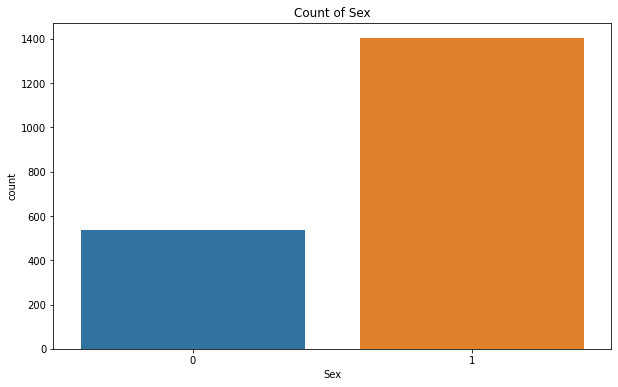

In [92]:
# visualization with Matplotlib
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=pandas_df)
plt.title('Count of Sex')
plt.show()



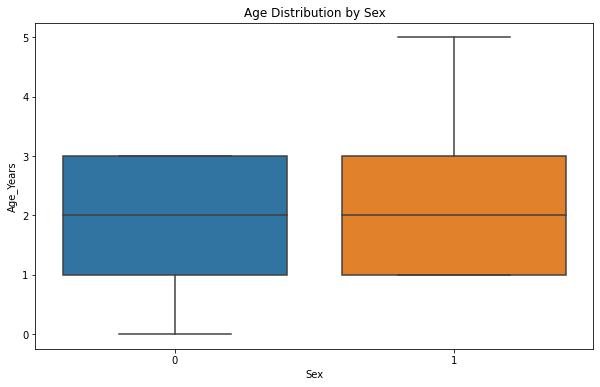

In [93]:
# visualization with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age_Years', data=pandas_df)
plt.title('Age Distribution by Sex')
plt.show()

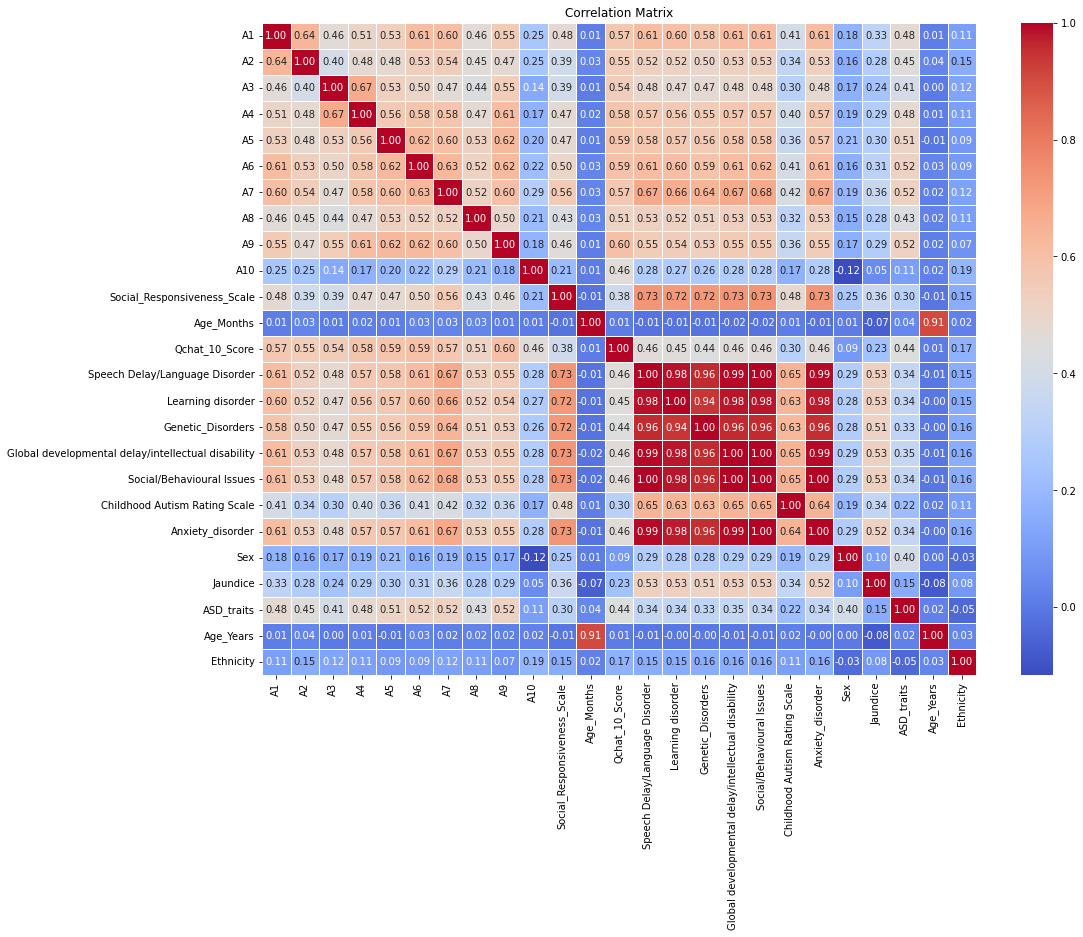

In [94]:
# Select the columns you want to include in the correlation matrix
selected_columns = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
    'Social_Responsiveness_Scale', 'Age_Months', 'Qchat_10_Score',
    'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders',
    'Global developmental delay/intellectual disability', 'Social/Behavioural Issues',
    'Childhood Autism Rating Scale', 'Anxiety_disorder', 'Sex', 'Jaundice',
    'ASD_traits', 'Age_Years', 'Ethnicity'
]

# Filter the DataFrame to include only the selected columns
selected_df = pandas_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)

Correlation Coefficients:
                                                          A1        A2  \
A1                                                  1.000000  0.637813   
A2                                                  0.637813  1.000000   
A3                                                  0.461161  0.398257   
A4                                                  0.506573  0.479045   
A5                                                  0.530593  0.479647   
A6                                                  0.610575  0.534402   
A7                                                  0.604345  0.541140   
A8                                                  0.461438  0.452173   
A9                                                  0.551170  0.474975   
A10                                                 0.250884  0.249534   
Social_Responsiveness_Scale                         0.475720  0.385761   
Age_Months                                          0.012548  0.031804   
Qchat_10_Sco

In [96]:
##4. Data Transformation 

In [97]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline


# Assuming 'label_column' is the column you want to predict

# Define feature columns
feature_columns = ['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Age_Years',
 'Ethnicity'
]

# Define label column
label_column = 'ASD_traits'  # Assuming 'ASD_traits' is the label column

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# String Indexer for label column (if it's categorical)
label_indexer = StringIndexer(inputCol=label_column, outputCol="label")

# Define Random Forest model
rf = RandomForestRegressor(featuresCol="features", labelCol="label")

# Create pipeline
pipeline = Pipeline(stages=[assembler, label_indexer, rf])

# Fit pipeline
pipeline_model = pipeline.fit(df)

# Get feature importances from Random Forest model
feature_importances = pipeline_model.stages[-1].featureImportances

# Print feature importances
print("Feature Importances:")
for i, feat in enumerate(feature_columns):
    print(f"{feat}: {feature_importances[i]}")

Feature Importances:
CASE_NO: 0.008668782290433007
A1: 0.004686206947889039
A2: 0.0032013278472149144
A3: 0.0019300407991262448
A4: 0.018179286117553848
A5: 0.034067536595308846
A6: 0.033974042814055534
A7: 0.09446907283500941
A8: 0.005027988759509566
A9: 0.034189627932194745
A10: 0.0
Social_Responsiveness_Scale: 0.0007217342184217899
Age_Months: 0.0005495703534442711
Qchat_10_Score: 0.1220243559431237
Speech Delay/Language Disorder: 0.013089164567498751
Learning disorder: 0.0023594381690033527
Genetic_Disorders: 0.0
Global developmental delay/intellectual disability: 0.014095455584756375
Social/Behavioural Issues: 0.004734307068719427
Childhood Autism Rating Scale: 0.0001505991206357033
Anxiety_disorder: 0.004826817931692629
Sex: 0.03753887001084587
Jaundice: 0.0
Family_mem_with_ASD: 0.01640084216529298
ASD_traits: 0.41993030876513776
Age_Years: 0.000345283929912581
Ethnicity: 0.12483933923321947


In [98]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Define feature columns
feature_columns = ['CASE_NO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
                   'Social_Responsiveness_Scale', 'Age_Months', 'Qchat_10_Score',
                   'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders',
                   'Global developmental delay/intellectual disability', 'Social/Behavioural Issues',
                   'Childhood Autism Rating Scale', 'Anxiety_disorder', 'Sex', 'Jaundice',
                   'Family_mem_with_ASD', 'Age_Years', 'Ethnicity']

# Define label column
label_column = 'ASD_traits'

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# String Indexer for label column (if it's categorical)
label_indexer = StringIndexer(inputCol=label_column, outputCol="label")

# Define Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Create pipeline
pipeline = Pipeline(stages=[assembler, label_indexer, rf])

# Fit pipeline
pipeline_model = pipeline.fit(df)

# Get feature importances from Random Forest model
feature_importances = pipeline_model.stages[-1].featureImportances

# Combine feature importances with column names
feature_importances_with_columns = [(feat, importance) for feat, importance in zip(feature_columns, feature_importances)]

# Sort feature importances in descending order
feature_importances_sorted = sorted(feature_importances_with_columns, key=lambda x: x[1], reverse=True)

# Print feature importances in descending order
print("Feature Importances (Descending Order):")
for feat, importance in feature_importances_sorted:
    print(f"{feat}: {importance}")


Feature Importances (Descending Order):
Qchat_10_Score: 0.23029521336801034
Ethnicity: 0.1880382194152614
A6: 0.11664802959760759
A9: 0.0588263009289088
Sex: 0.05473163551739888
A5: 0.05139985053746019
A7: 0.05018820600597866
A1: 0.048876907305666795
Family_mem_with_ASD: 0.03155091719529733
Global developmental delay/intellectual disability: 0.028154882766620953
CASE_NO: 0.027711773637070315
Anxiety_disorder: 0.020566180925473753
Learning disorder: 0.015731655219138493
Speech Delay/Language Disorder: 0.015099051563875926
A4: 0.013754128624857573
Genetic_Disorders: 0.012972919230849709
A8: 0.009325067225627417
A3: 0.008248593243809237
A10: 0.006607776356807421
Social/Behavioural Issues: 0.004210242468286023
A2: 0.0027581745258338586
Age_Months: 0.0015982086861419948
Social_Responsiveness_Scale: 0.0009350532305440085
Childhood Autism Rating Scale: 0.0008981641748802546
Age_Years: 0.0004892929660185016
Jaundice: 0.00038355528257459165


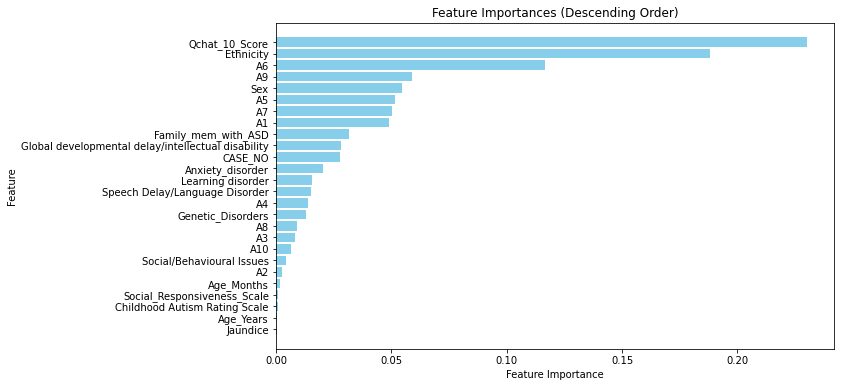

In [99]:
import matplotlib.pyplot as plt

# Extract feature names and importances from the sorted list
sorted_feature_names = [feat for feat, _ in feature_importances_sorted]
sorted_importances = [importance for _, importance in feature_importances_sorted]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [100]:
df.columns

['CASE_NO',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Age_Months',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Childhood Autism Rating Scale',
 'Anxiety_disorder',
 'Sex',
 'Jaundice',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Age_Years',
 'Ethnicity']

In [101]:
# Columns to be filtered out
columns_to_filter = ['CASE_NO','Age_Months', 'Age_Years', 'Jaundice', 
                     'Childhood Autism Rating Scale', 
                     'Global developmental delay/intellectual disability', 
                     'A3']

# Drop the specified columns
df = df.drop(*columns_to_filter)

# Show the filtered DataFrame
df.head()

Row(A1=0, A2=0, A4=0, A5=0, A6=0, A7=1, A8=1, A9=0, A10=1, Social_Responsiveness_Scale=3, Qchat_10_Score=3, Speech Delay/Language Disorder=1, Learning disorder=1, Genetic_Disorders=1, Social/Behavioural Issues=1, Anxiety_disorder=1, Sex=0, Family_mem_with_ASD=0, ASD_traits=0, Ethnicity=2.0)

In [102]:
df.columns

['A1',
 'A2',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Ethnicity']

In [103]:
df.columns

['A1',
 'A2',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Ethnicity']

In [104]:
# Count the number of rows
num_rows = df.count()

# Count the number of columns
num_cols = len(df.columns)

# Print the shape of the DataFrame
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (1938, 20)


In [105]:
##4.2 Data Projection

# Balancing

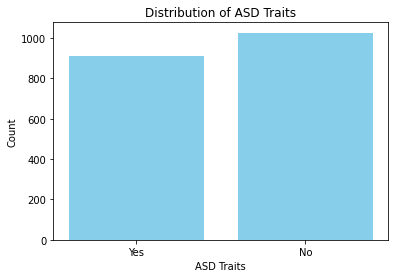

In [106]:
# Group by 'ASD_traits' and count the occurrences of each class
class_distribution = df.groupBy('ASD_traits').count().collect()

# Extract counts for each class
class_labels = [row['ASD_traits'] for row in class_distribution]
class_counts = [row['count'] for row in class_distribution]

# Plotting the distribution
plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel('ASD Traits')
plt.ylabel('Count')
plt.title('Distribution of ASD Traits')
plt.xticks(class_labels, ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes'
plt.show()

In [107]:
# Group by 'ASD_traits' and count the occurrences of each class
class_counts = df.groupBy('ASD_traits').count()

# Display the counts
class_counts.show()

+----------+-----+
|ASD_traits|count|
+----------+-----+
|         1| 1027|
|         0|  911|
+----------+-----+



In [108]:
# Separate the minority and majority classes
df_high = df.filter(col('ASD_traits') == 0)
df_low = df.filter(col('ASD_traits') == 1)

# Upsample the minority class to match the size of the majority class
minority_count = df_low.count()
majority_count = df_high.count()

df_low_boosted = df_low.sample(True, majority_count / minority_count, seed=42)

# Combine the upsampled minority class with the majority class
df_boosted = df_high.union(df_low_boosted)

# Check the class distribution in the balanced dataset
df_boosted.groupBy('ASD_traits').count().show()

df = df_boosted

+----------+-----+
|ASD_traits|count|
+----------+-----+
|         0|  911|
|         1|  935|
+----------+-----+



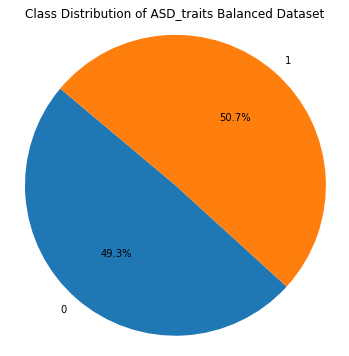

In [109]:
# Calculate class counts
class_counts = df_boosted.groupBy('ASD_traits').count().collect()

# Extract class labels and counts
labels = [str(row['ASD_traits']) for row in class_counts]
counts = [row['count'] for row in class_counts]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of ASD_traits Balanced Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

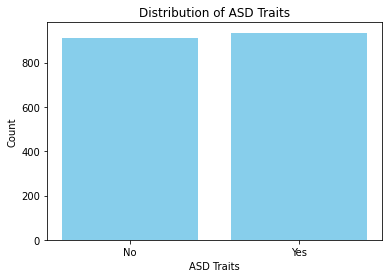

In [110]:
# Group by 'ASD_traits' and count the occurrences of each class
class_distribution = df.groupBy('ASD_traits').count().collect()

# Extract counts for each class
class_labels = [row['ASD_traits'] for row in class_distribution]
class_counts = [row['count'] for row in class_distribution]

# Plotting the distribution
plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel('ASD Traits')
plt.ylabel('Count')
plt.title('Distribution of ASD Traits')
plt.xticks(class_labels, ['No', 'Yes'])  # Replace 0 and 1 with 'No' and 'Yes'
plt.show()

In [111]:
# Count the number of rows
num_rows = df.count()

# Count the number of columns
num_cols = len(df.columns)

# Print the shape of the DataFrame
print(f"Shape: ({num_rows}, {num_cols})")

Shape: (1846, 20)


In [112]:
# 05-DMM
#Considering the data mining objectives and the data types at hand,we have identified the most appropriate data mining method to be the classification method.Classification method can predict a binary outcome -assign the toddlers to one of the two groups, either having autism traits or not having autism traits based on other values.

In [113]:
# 06-DMA

# Load relevant algorithms

# Logistic Regression, Decision Tree, Naive Bayes; SVC; kNN
# Execute DM task

In [191]:
 # Algorithm:Decision Tree

In [192]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

# Define feature columns and target column
feature_columns = [col for col in df.columns if col != 'ASD_traits']

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembled_features")
df = assembler.transform(df)

# Split the dataset into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="ASD_traits", featuresCol="assembled_features", seed=42)
dt_model = dt.fit(train_data)

# Make predictions on the test set
predictions = dt_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9847036328871893


In [193]:

# Make predictions on the training set
train_predictions = dt_model.transform(train_data)

# Make predictions on the test set
test_predictions = dt_model.transform(test_data)

# Define an evaluator for classification
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction")

# Function to print evaluation metrics
def evaluate(predictions, dataset_name):
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    f1 = evaluator.setMetricName("f1").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    print(f"Results for {dataset_name} data:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("")

# Evaluate the model on training data
evaluate(train_predictions, "training")

# Evaluate the model on test data
evaluate(test_predictions, "test")

Results for training data:
Accuracy: 0.9841269841269841
F1 Score: 0.9841255323032372
Precision: 0.9841522145405597
Recall: 0.9841269841269842

Results for test data:
Accuracy: 0.9847036328871893
F1 Score: 0.9847036328871892
Precision: 0.9847036328871892
Recall: 0.9847036328871892



Results for training data:
Accuracy: 0.9841269841269841
F1 Score: 0.9841255323032372
Precision: 0.9841522145405597
Recall: 0.9841269841269842

Confusion Matrix for training data:
Predicted  0.0  1.0   All
Actual                   
0          667    8   675
1           13  635   648
All        680  643  1323


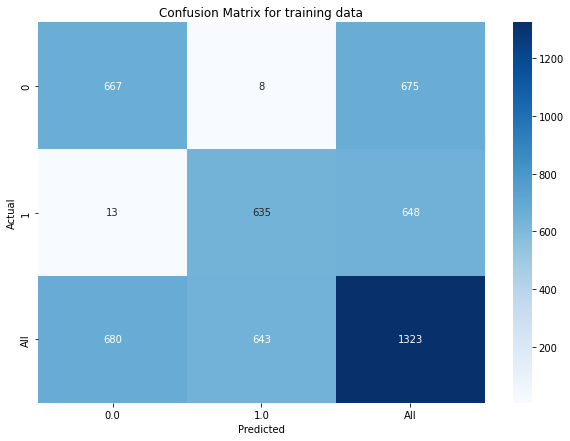

Results for test data:
Accuracy: 0.9847036328871893
F1 Score: 0.9847036328871892
Precision: 0.9847036328871892
Recall: 0.9847036328871892

Confusion Matrix for test data:
Predicted  0.0  1.0  All
Actual                  
0          232    4  236
1            4  283  287
All        236  287  523


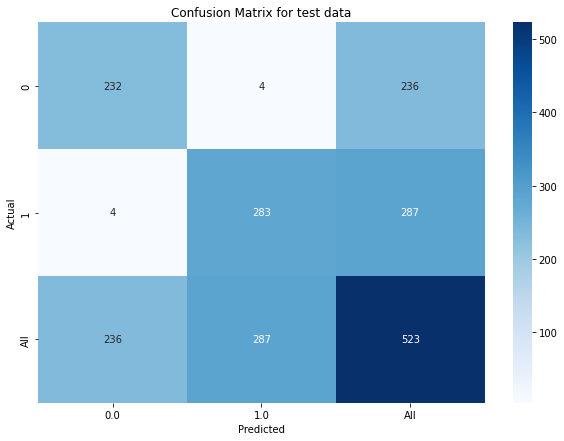

In [194]:
# Function to print evaluation metrics and confusion matrix
def evaluate(predictions, dataset_name):
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    f1 = evaluator.setMetricName("f1").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    
    print(f"Results for {dataset_name} data:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("")
    
    # Confusion matrix
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(f"Confusion Matrix for {dataset_name} data:")
    print(confusion)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {dataset_name} data')
    plt.show()

# Evaluate the model on training data
evaluate(train_predictions, "training")

# Evaluate the model on test data
evaluate(test_predictions, "test")

In [195]:
# Function to get classification report
def get_classification_report(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    from sklearn.metrics import classification_report
    return classification_report(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'])

# Print classification report
classification_report = get_classification_report(test_predictions)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       236
           1       0.99      0.99      0.99       287

    accuracy                           0.98       523
   macro avg       0.98      0.98      0.98       523
weighted avg       0.98      0.98      0.98       523



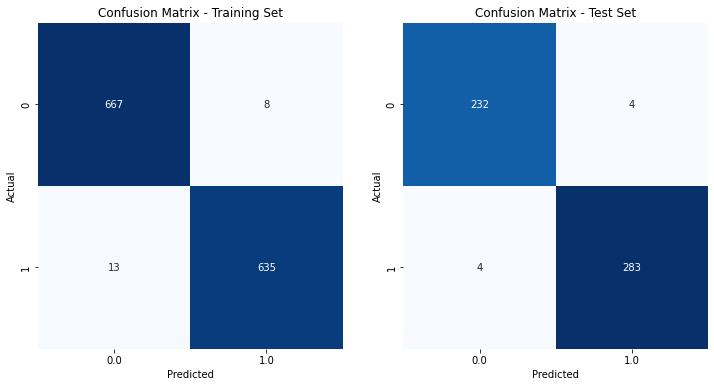

In [196]:
# Function to get confusion matrix
def get_confusion_matrix(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrices for both training and test sets
train_confusion = get_confusion_matrix(train_predictions)
test_confusion = get_confusion_matrix(test_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')

# Test set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')

plt.show()

In [259]:
# Algorithm: logistic regression

Test Accuracy: 0.9349904397705545


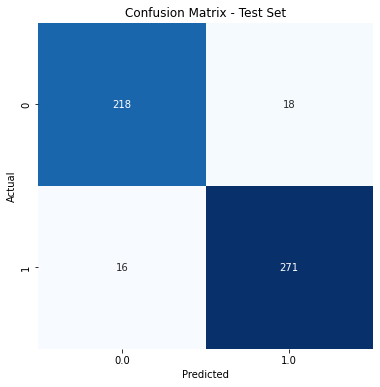

In [120]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

feature_columns = [col for col in df.columns if col != 'ASD_traits']

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Split the dataset into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the LogisticRegression model
lr = LogisticRegression(labelCol="ASD_traits", featuresCol="features")
lr_model = lr.fit(train_data)

# Make predictions on the test set
test_predictions = lr_model.transform(test_data)

# Evaluate the model using MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
test_accuracy = evaluator.evaluate(test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Function to get confusion matrix
def get_confusion_matrix(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrix for the test set
test_confusion = get_confusion_matrix(test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.show()

In [121]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

# Function to print evaluation metrics and confusion matrix
def evaluate(predictions, dataset_name):
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    f1 = evaluator.setMetricName("f1").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    
    print(f"Results for {dataset_name} data:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("")
    print(f"Confusion Matrix for {dataset_name} data:")
    predictions.groupBy("ASD_traits", "prediction").count().show()


# Split the dataset into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the Logistic Regression model
lr = LogisticRegression(labelCol="ASD_traits", featuresCol="features")
lr_model = lr.fit(train_data)

# Make predictions on the training set
train_predictions = lr_model.transform(train_data)

# Make predictions on the test set
test_predictions = lr_model.transform(test_data)

# Initialize evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction")

# Evaluate the model on the training set
evaluate(train_predictions, "Training")

# Evaluate the model on the test set
evaluate(test_predictions, "Test")

Results for Training data:
Accuracy: 0.9380196523053665
F1 Score: 0.9380126366249318
Precision: 0.93804423659208
Recall: 0.9380196523053665

Confusion Matrix for Training data:
+----------+----------+-----+
|ASD_traits|prediction|count|
+----------+----------+-----+
|         0|       0.0|  637|
|         0|       1.0|   38|
|         1|       0.0|   44|
|         1|       1.0|  604|
+----------+----------+-----+

Results for Test data:
Accuracy: 0.9349904397705545
F1 Score: 0.9349649853771432
Precision: 0.9349671421363218
Recall: 0.9349904397705544

Confusion Matrix for Test data:
+----------+----------+-----+
|ASD_traits|prediction|count|
+----------+----------+-----+
|         0|       0.0|  218|
|         0|       1.0|   18|
|         1|       0.0|   16|
|         1|       1.0|  271|
+----------+----------+-----+



24/05/21 05:51:42 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 05:51:43 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


Confusion Matrix - Training Set
Predicted  0.0  1.0
Actual             
0          637   38
1           44  604

Confusion Matrix - Test Set
Predicted  0.0  1.0
Actual             
0          218   18
1           16  271


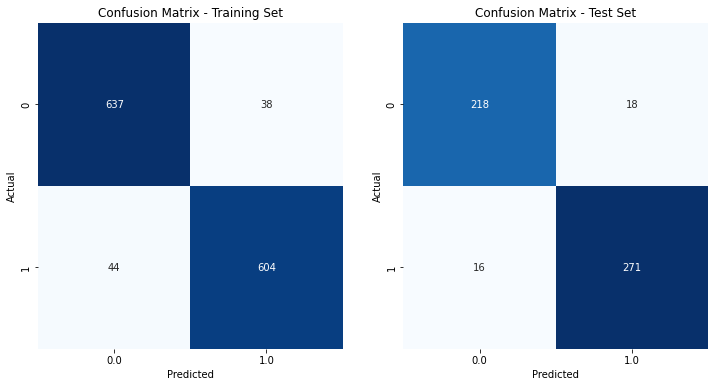

In [264]:
# Function to get confusion matrix
def get_confusion_matrix(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrices for both training and test sets
train_confusion = get_confusion_matrix(train_predictions)
test_confusion = get_confusion_matrix(test_predictions)

# Print confusion matrices
print("Confusion Matrix - Training Set")
print(train_confusion)
print("\nConfusion Matrix - Test Set")
print(test_confusion)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')

# Test set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')

plt.show()

In [204]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [265]:
# Function to get confusion matrix
def get_confusion_matrix(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrices for both training and test sets
train_confusion = get_confusion_matrix(train_predictions)
test_confusion = get_confusion_matrix(test_predictions)

# Print confusion matrices
print("Confusion Matrix - Training Set")
print(train_confusion)
print("\nConfusion Matrix - Test Set")
print(test_confusion)

24/05/21 05:52:03 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 05:52:05 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


Confusion Matrix - Training Set
Predicted  0.0  1.0
Actual             
0          637   38
1           44  604

Confusion Matrix - Test Set
Predicted  0.0  1.0
Actual             
0          218   18
1           16  271


In [ ]:
#### Algorithm:Naive bayes

In [226]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Split the dataset into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the NaiveBayes model
nb = NaiveBayes(labelCol="ASD_traits", featuresCol="features")
nb_model = nb.fit(train_data)

# Make predictions on the test set
test_predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
test_accuracy = evaluator.evaluate(test_predictions)
print(f"Test Accuracy: {test_accuracy}")


# Generate detailed metrics using MulticlassClassificationEvaluator
precision = evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(test_predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(test_predictions, {evaluator.metricName: "f1"})
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1_score}")


24/05/21 04:16:31 WARN DAGScheduler: Broadcasting large task binary with size 1379.3 KiB
24/05/21 04:16:32 WARN DAGScheduler: Broadcasting large task binary with size 1115.1 KiB
24/05/21 04:16:33 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Test Accuracy: 0.7590822179732314


24/05/21 04:16:34 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:16:36 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:16:37 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Precision: 0.7687675387269788, Recall: 0.7590822179732313, F1-score: 0.7594699309300277


In [227]:
# Make predictions on the training set
train_predictions = nb_model.transform(train_data)

# Make predictions on the test set
test_predictions = nb_model.transform(test_data)

# Evaluate the model on the training set
train_evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
train_accuracy = train_evaluator.evaluate(train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the test set
test_evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
test_accuracy = test_evaluator.evaluate(test_predictions)
print(f"Test Accuracy: {test_accuracy}")

24/05/21 04:16:47 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Training Accuracy: 0.7762660619803476


24/05/21 04:16:49 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Test Accuracy: 0.7590822179732314


24/05/21 04:19:15 WARN DAGScheduler: Broadcasting large task binary with size 1394.5 KiB
24/05/21 04:19:17 WARN DAGScheduler: Broadcasting large task binary with size 1127.3 KiB


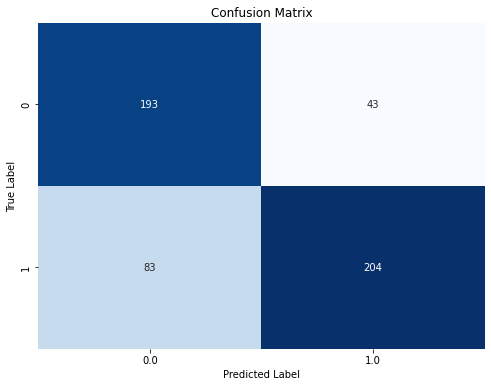

In [228]:
# Get confusion matrix
confusion_matrix = test_predictions.groupBy("ASD_traits", "prediction").count()

# Convert Spark DataFrame to Pandas DataFrame
confusion_matrix_pd = confusion_matrix.toPandas()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_pd.pivot(index='ASD_traits', columns='prediction', values='count'), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix - Training Set
DataFrame[ASD_traits: int, prediction: double, count: bigint]

Confusion Matrix - Test Set
DataFrame[ASD_traits: int, prediction: double, count: bigint]


24/05/21 05:58:58 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 05:59:00 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
24/05/21 05:59:00 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 05:59:02 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB


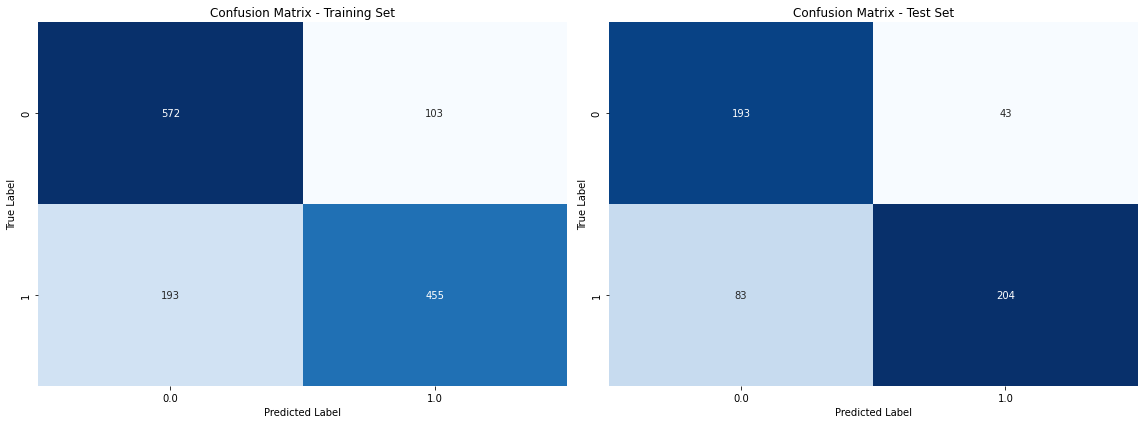

In [266]:
# Make predictions on the training set
train_predictions = nb_model.transform(train_data)

# Make predictions on the test set
test_predictions = nb_model.transform(test_data)

# Get confusion matrix for train and test sets
train_confusion_matrix = train_predictions.groupBy("ASD_traits", "prediction").count()
test_confusion_matrix = test_predictions.groupBy("ASD_traits", "prediction").count()



# Convert Spark DataFrames to Pandas DataFrames
train_confusion_matrix_pd = train_confusion_matrix.toPandas()
test_confusion_matrix_pd = test_confusion_matrix.toPandas()

# Plot confusion matrices side by side
plt.figure(figsize=(16, 6))

# Plot confusion matrix for training set
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion_matrix_pd.pivot(index='ASD_traits', columns='prediction', values='count'), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Set')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion_matrix_pd.pivot(index='ASD_traits', columns='prediction', values='count'), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')

plt.tight_layout()
plt.show()

In [230]:
# Make predictions on the test set
predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

# Print accuracy
print("Test Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(predictions.groupby("ASD_traits").count().show())

24/05/21 04:19:36 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Test Accuracy: 0.7590822179732314
Classification Report:


24/05/21 04:19:38 WARN DAGScheduler: Broadcasting large task binary with size 1373.8 KiB


+----------+-----+
|ASD_traits|count|
+----------+-----+
|         0|  236|
|         1|  287|
+----------+-----+

None


24/05/21 04:19:39 WARN DAGScheduler: Broadcasting large task binary with size 1115.4 KiB


In [225]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col

# Function to print evaluation metrics and confusion matrix
def evaluate(predictions, dataset_name):
    evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction")
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    f1 = evaluator.setMetricName("f1").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    
    print(f"Results for {dataset_name} data:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("")

# Assuming df3 is your DataFrame and already exists
# Define feature columns and target column
feature_columns = [col for col in df.columns if col != 'ASD_traits']

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="hfeatures")
df = assembler.transform(df)

# Split the dataset into training and testing sets
(train_data, test_data) = df.randomSplit([0.7, 0.3], seed=42)

# Initialize and train the NaiveBayes model
nb = NaiveBayes(labelCol="ASD_traits", featuresCol="features")
nb_model = nb.fit(train_data)

# Make predictions on the training set
train_predictions = nb_model.transform(train_data)

# Make predictions on the test set
test_predictions = nb_model.transform(test_data)

# Print classification reports for both training and testing sets
print("Classification Report for Training Set:")
evaluate(train_predictions, "Training")

print("Classification Report for Test Set:")
evaluate(test_predictions, "Test")

24/05/21 04:12:17 WARN DAGScheduler: Broadcasting large task binary with size 1379.3 KiB
24/05/21 04:12:19 WARN DAGScheduler: Broadcasting large task binary with size 1115.1 KiB


Classification Report for Training Set:


24/05/21 04:12:19 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:21 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:23 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:24 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Results for Training data:
Accuracy: 0.7762660619803476
F1 Score: 0.7749094662740719
Precision: 0.7808714883802983
Recall: 0.7762660619803476

Classification Report for Test Set:


24/05/21 04:12:26 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:27 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:29 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB
24/05/21 04:12:30 WARN DAGScheduler: Broadcasting large task binary with size 1390.4 KiB


Results for Test data:
Accuracy: 0.7590822179732314
F1 Score: 0.7594699309300277
Precision: 0.7687675387269788
Recall: 0.7590822179732313



In [231]:
#Algorithm: SVC(Support Vector Classifier)

In [239]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="sfeatures")
pipeline = Pipeline(stages=[assembler])

# Transform the data
df_transformed = pipeline.fit(df).transform(df)

# Split the data into training and testing sets
train_data, test_data = df_transformed.randomSplit([0.7, 0.3], seed=42)

# Define the SVC model
svc = LinearSVC(featuresCol="features", labelCol=label_column)

# Train the model
svc_model = svc.fit(train_data)

# Make predictions on the testing data
predictions_test = svc_model.transform(test_data)

# Make predictions on the training data
predictions_train = svc_model.transform(train_data)

# Evaluate the model on the testing data
evaluator = MulticlassClassificationEvaluator(labelCol=label_column, predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator.evaluate(predictions_test)
print("Test Accuracy:", accuracy_test)



24/05/21 04:32:35 WARN DAGScheduler: Broadcasting large task binary with size 1927.5 KiB
24/05/21 04:32:36 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:38 WAR

24/05/21 04:32:46 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:46 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:46 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:46 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:47 WAR

24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:55 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:56 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:56 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:32:56 WAR

24/05/21 04:33:02 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:02 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:02 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:02 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:03 WAR

24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:10 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:11 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:11 WAR

24/05/21 04:33:18 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:18 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:18 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WARN DAGScheduler: Broadcasting large task binary with size 1928.8 KiB
24/05/21 04:33:19 WAR

Test Accuracy: 0.8623326959847036


In [240]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the model on the training data
evaluator_train = MulticlassClassificationEvaluator(labelCol=label_column, predictionCol="prediction", metricName="accuracy")
accuracy_train = evaluator_train.evaluate(predictions_train)
print("Train Accuracy:", accuracy_train)

# Evaluate the model on the testing data
evaluator_test = MulticlassClassificationEvaluator(labelCol=label_column, predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predictions_test)
print("Test Accuracy:", accuracy_test)

24/05/21 04:33:39 WARN DAGScheduler: Broadcasting large task binary with size 1938.8 KiB


Train Accuracy: 0.8775510204081632


24/05/21 04:33:41 WARN DAGScheduler: Broadcasting large task binary with size 1938.8 KiB


Test Accuracy: 0.8623326959847036


In [277]:
# Make predictions on the training set
train_predictions =  svc_model.transform(train_data)

# Make predictions on the test set
test_predictions = svc_model.transform(test_data)

# Print classification reports for both training and testing sets
print("Classification Report for Training Set:")
evaluate(train_predictions, "Training")

print("Classification Report for Test Set:")
evaluate(test_predictions, "Test")

Classification Report for Training Set:


24/05/21 06:39:44 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:39:47 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:39:49 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:39:52 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


Results for Training data:
Accuracy: 0.8775510204081632
F1 Score: 0.8760612304523628
Precision: 0.892824943585111
Recall: 0.8775510204081632

Confusion Matrix for Training data:


24/05/21 06:39:54 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:39:56 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB


+----------+----------+-----+
|ASD_traits|prediction|count|
+----------+----------+-----+
|         0|       0.0|  660|
|         0|       1.0|   15|
|         1|       0.0|  147|
|         1|       1.0|  501|
+----------+----------+-----+

Classification Report for Test Set:


24/05/21 06:39:57 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:39:59 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:40:02 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
24/05/21 06:40:04 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


Results for Test data:
Accuracy: 0.8623326959847036
F1 Score: 0.862306524258925
Precision: 0.8795060774129975
Recall: 0.8623326959847036

Confusion Matrix for Test data:


24/05/21 06:40:06 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


+----------+----------+-----+
|ASD_traits|prediction|count|
+----------+----------+-----+
|         0|       0.0|  226|
|         0|       1.0|   10|
|         1|       0.0|   62|
|         1|       1.0|  225|
+----------+----------+-----+



24/05/21 06:40:09 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB


In [250]:
# Evaluate the model on the testing data
evaluator = MulticlassClassificationEvaluator(labelCol=label_column, predictionCol="prediction")
confusion_matrix_test = predictions_test.select("ASD_traits", "prediction")
confusion_matrix_test = confusion_matrix_test.crosstab("ASD_traits", "prediction")

# Evaluate the model on the testing data
evaluator_test = MulticlassClassificationEvaluator(labelCol=label_column, predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predictions_test)
print("Test Accuracy:", accuracy_test)

# Show confusion matrix for testing data
print("Confusion Matrix for Testing Data:")
confusion_matrix_test.show()

24/05/21 05:01:43 WARN DAGScheduler: Broadcasting large task binary with size 1396.1 KiB
24/05/21 05:01:44 WARN DAGScheduler: Broadcasting large task binary with size 1128.9 KiB
24/05/21 05:01:45 WARN DAGScheduler: Broadcasting large task binary with size 1383.5 KiB


Test Accuracy: 0.8623326959847036
Confusion Matrix for Testing Data:
+---------------------+---+---+
|ASD_traits_prediction|0.0|1.0|
+---------------------+---+---+
|                    0|226| 10|
|                    1| 62|225|
+---------------------+---+---+



24/05/21 04:58:11 WARN DAGScheduler: Broadcasting large task binary with size 1381.7 KiB
24/05/21 04:58:12 WARN DAGScheduler: Broadcasting large task binary with size 1381.6 KiB


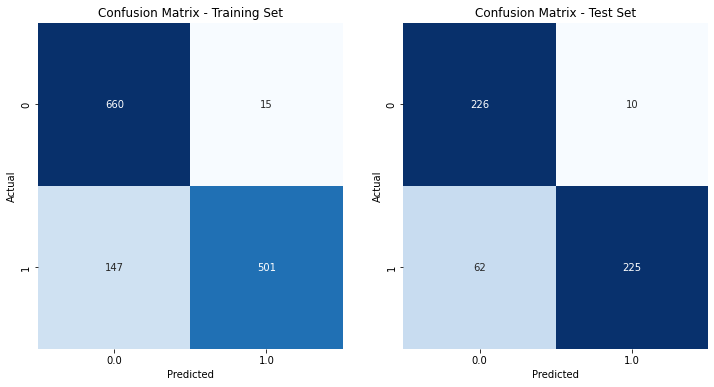

In [249]:
# Function to get confusion matrix
def get_confusion_matrix(predictions):
    # Selecting columns 'ASD_traits' and 'prediction' and converting to Pandas DataFrame
    pred_and_labels_pandas = predictions.select("ASD_traits", "prediction").toPandas()
    # Computing confusion matrix using Pandas crosstab
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrices for both training and test sets
train_confusion = get_confusion_matrix(predictions_train)
test_confusion = get_confusion_matrix(predictions_test)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')

# Test set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')

plt.show()

In [167]:
df.columns

df = df.drop('tassemble_features',
 'iassemble_features',
 'uassemble_features',
 'features',
 'assembled_features',
 'wassembled_features')

In [168]:
df.columns

['A1',
 'A2',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Social_Responsiveness_Scale',
 'Qchat_10_Score',
 'Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Family_mem_with_ASD',
 'ASD_traits',
 'Ethnicity']

In [122]:
##7:DM- Decision Tree

In [169]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [170]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("DecisionTreeModel") \
    .getOrCreate()

In [171]:
# Load the data into a DataFrame (assuming df is the DataFrame)
# df = spark.read.format("csv").option("header", "true").load("dataset.csv")

In [172]:
# Define feature columns and target column
feature_columns = [col for col in df.columns if col != 'ASD_traits']

# Assemble feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembled_features")
df = assembler.transform(df)

In [173]:
# Split the data into training and testing sets
df_train, df_test = df.randomSplit([0.7, 0.3], seed=42)

In [174]:
# Initialize the Decision tree model
dt = DecisionTreeClassifier(labelCol="ASD_traits", featuresCol="assembled_features", seed=42)

In [175]:
#Train the DecisionTreeClassifier
dt_model = dt.fit(df_train)

In [176]:
# Make predictions on the test set
predictions = dt_model.transform(df_test)

In [177]:
# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9847036328871893


In [178]:
# Make predictions on the training set
train_predictions = dt_model.transform(df_train)

# Make predictions on the test set
test_predictions = dt_model.transform(df_test)

# Define an evaluator for classification
evaluator = MulticlassClassificationEvaluator(labelCol="ASD_traits", predictionCol="prediction")

# Function to print evaluation metrics
def evaluate(predictions, dataset_name):
    accuracy = evaluator.setMetricName("accuracy").evaluate(predictions)
    f1 = evaluator.setMetricName("f1").evaluate(predictions)
    precision = evaluator.setMetricName("weightedPrecision").evaluate(predictions)
    recall = evaluator.setMetricName("weightedRecall").evaluate(predictions)
    print(f"Results for {dataset_name} data:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print("")

# Evaluate the model on training data
evaluate(train_predictions, "training")

# Evaluate the model on test data
evaluate(test_predictions, "test")

Results for training data:
Accuracy: 0.9841269841269841
F1 Score: 0.9841255323032372
Precision: 0.9841522145405597
Recall: 0.9841269841269842

Results for test data:
Accuracy: 0.9847036328871893
F1 Score: 0.9847036328871892
Precision: 0.9847036328871892
Recall: 0.9847036328871892



In [204]:
# Function to get classification report
def get_classification_report(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    from sklearn.metrics import classification_report
    return classification_report(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'])

# Print classification report
classification_report = get_classification_report(test_predictions)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       236
           1       0.99      0.99      0.99       287

    accuracy                           0.98       523
   macro avg       0.98      0.98      0.98       523
weighted avg       0.98      0.98      0.98       523



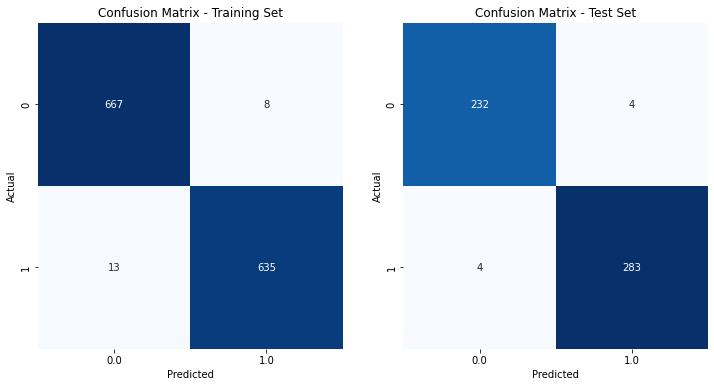

In [203]:
# Function to get confusion matrix
def get_confusion_matrix(predictions):
    pred_and_labels = predictions.select("ASD_traits", "prediction")
    pred_and_labels_pandas = pred_and_labels.toPandas()
    confusion = pd.crosstab(pred_and_labels_pandas['ASD_traits'], pred_and_labels_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'], margins=False)
    return confusion

# Get confusion matrices for both training and test sets
train_confusion = get_confusion_matrix(train_predictions)
test_confusion = get_confusion_matrix(test_predictions)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

# Training set confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')

# Test set confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(test_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')

plt.show()

In [179]:
# Visualize the Decision Tree structure
print("Learned Decision Tree model:")
print(dt_model.toDebugString)

Learned Decision Tree model:
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_07455994ba72, depth=5, numNodes=33, numClasses=2, numFeatures=19
  If (feature 10 <= 3.5)
   If (feature 10 <= 1.5)
    If (feature 16 <= 0.5)
     Predict: 0.0
    Else (feature 16 > 0.5)
     If (feature 18 in {2.0,4.0,5.0,7.0,9.0,11.0})
      If (feature 0 <= 0.5)
       Predict: 0.0
      Else (feature 0 > 0.5)
       Predict: 1.0
     Else (feature 18 not in {2.0,4.0,5.0,7.0,9.0,11.0})
      If (feature 13 <= 0.5)
       Predict: 1.0
      Else (feature 13 > 0.5)
       Predict: 0.0
   Else (feature 10 > 1.5)
    If (feature 18 in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0})
     Predict: 0.0
    Else (feature 18 not in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0})
     If (feature 11 <= 0.5)
      Predict: 1.0
     Else (feature 11 > 0.5)
      Predict: 0.0
  Else (feature 10 > 3.5)
   If (feature 18 in {3.0,10.0,12.0,13.0})
    If (feature 11 <= 0.5)
     Predict: 0.0
    Else (feature 11 > 0.5)
    

In [180]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [181]:
print(dt_model)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_07455994ba72, depth=5, numNodes=33, numClasses=2, numFeatures=19


In [184]:
!pip install graphviz


Defaulting to user installation because normal site-packages is not writeable


In [185]:
!pip install pydotplus
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [189]:
feature_names = df.columns[:-1]  # Exclude the target variable column
print(feature_names[:21])  # Print the first 21 feature names


['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Social_Responsiveness_Scale', 'Qchat_10_Score', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Social/Behavioural Issues', 'Anxiety_disorder', 'Sex', 'Family_mem_with_ASD', 'ASD_traits', 'Ethnicity']


                           feature  importance
10                  Qchat_10_Score    0.436395
18                       Ethnicity    0.257609
16                             Sex    0.115173
13               Genetic_Disorders    0.070976
5                               A7    0.043252
0                               A1    0.039045
11  Speech Delay/Language Disorder    0.036177
4                               A6    0.001374
6                               A8    0.000000
7                               A9    0.000000
8                              A10    0.000000
1                               A2    0.000000
12               Learning disorder    0.000000
3                               A5    0.000000
14       Social/Behavioural Issues    0.000000
15                Anxiety_disorder    0.000000
2                               A4    0.000000
17             Family_mem_with_ASD    0.000000
9      Social_Responsiveness_Scale    0.000000


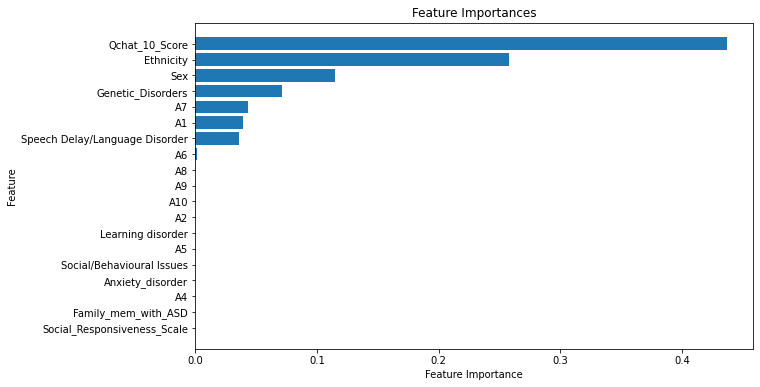

In [193]:
# Extract feature importances
feature_importances = dt_model.featureImportances.toArray()

# Get the names of the features
f_type_to_flist_dict = df.schema['assembled_features'].metadata["ml_attr"]["attrs"]

f_index_to_name_dict = {}
for f_type, f_list in f_type_to_flist_dict.items():
    for f in f_list:
        f_index = f['idx']
        f_name = f['name']
        f_index_to_name_dict[f_index] = f_name

# Create a DataFrame for feature importances
feature_names = [f_index_to_name_dict[i] for i in range(len(feature_importances))]
features_df = pd.DataFrame(list(zip(feature_names, feature_importances)), columns=['feature', 'importance'])

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='importance', ascending=False)

# Print the feature importances
print(features_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['feature'], features_df['importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Trying to get better visualisation of the decision tree model with JASON format file

In [194]:
dt_model.toDebugString

'DecisionTreeClassificationModel: uid=DecisionTreeClassifier_07455994ba72, depth=5, numNodes=33, numClasses=2, numFeatures=19\n  If (feature 10 <= 3.5)\n   If (feature 10 <= 1.5)\n    If (feature 16 <= 0.5)\n     Predict: 0.0\n    Else (feature 16 > 0.5)\n     If (feature 18 in {2.0,4.0,5.0,7.0,9.0,11.0})\n      If (feature 0 <= 0.5)\n       Predict: 0.0\n      Else (feature 0 > 0.5)\n       Predict: 1.0\n     Else (feature 18 not in {2.0,4.0,5.0,7.0,9.0,11.0})\n      If (feature 13 <= 0.5)\n       Predict: 1.0\n      Else (feature 13 > 0.5)\n       Predict: 0.0\n   Else (feature 10 > 1.5)\n    If (feature 18 in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0})\n     Predict: 0.0\n    Else (feature 18 not in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0})\n     If (feature 11 <= 0.5)\n      Predict: 1.0\n     Else (feature 11 > 0.5)\n      Predict: 0.0\n  Else (feature 10 > 3.5)\n   If (feature 18 in {3.0,10.0,12.0,13.0})\n    If (feature 11 <= 0.5)\n     Predict: 0.0\n    Else (feature 11 > 0.5)\n   

In [195]:
def parse_debug_string_lines(lines):
    
    block = []
    while lines:


        if lines[0].startswith('If'):
            bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
            block.append({'name': bl, 'children': parse_debug_string_lines(lines)})


            if lines[0].startswith('Else'):
                be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
                block.append({'name': be, 'children': parse_debug_string_lines(lines)})
        elif not lines[0].startswith(('If', 'Else')):
            block2 = lines.pop(0)
            block.append({'name': block2})
        else:
            break
    
    return block


def debug_str_to_json(debug_string):
    data = []
    for line in debug_string.splitlines():
        if line.strip():
            line = line.strip()
            data.append(line)
        else:
            break
        if not line: break

    json = {'name': 'Root', 'children': parse_debug_string_lines(data[1:])}
    
    return json

In [196]:
import json

In [198]:
dict_tree_json = debug_str_to_json(dt_model.toDebugString)

print(json.dumps(dict_tree_json,indent = 1 ))

{
 "name": "Root",
 "children": [
  {
   "name": "feature 10 <= 3.5",
   "children": [
    {
     "name": "feature 10 <= 1.5",
     "children": [
      {
       "name": "feature 16 <= 0.5",
       "children": [
        {
         "name": "Predict: 0.0"
        }
       ]
      },
      {
       "name": "feature 16 > 0.5",
       "children": [
        {
         "name": "feature 18 in {2.0,4.0,5.0,7.0,9.0,11.0}",
         "children": [
          {
           "name": "feature 0 <= 0.5",
           "children": [
            {
             "name": "Predict: 0.0"
            }
           ]
          },
          {
           "name": "feature 0 > 0.5",
           "children": [
            {
             "name": "Predict: 1.0"
            }
           ]
          }
         ]
        },
        {
         "name": "feature 18 not in {2.0,4.0,5.0,7.0,9.0,11.0}",
         "children": [
          {
           "name": "feature 13 <= 0.5",
           "children": [
            {
             "name":

In [200]:
f_type_to_flist_dict = df.schema['assembled_features'].metadata["ml_attr"]["attrs"]
f_index_to_name_dict = {}
for f_type, f_list in f_type_to_flist_dict.items():
   for f in f_list:
       f_index = f['idx']
       f_name = f['name']
       f_index_to_name_dict[f_index] = f_name

tree = dt_model.toDebugString
for i in range(len(f_index_to_name_dict)):
   tree = tree.replace('feature {}'.format(i), f_index_to_name_dict.get(i))

debug_str_to_json(tree)



{'name': 'Root',
 'children': [{'name': 'A20 <= 3.5',
   'children': [{'name': 'A20 <= 1.5',
     'children': [{'name': 'A26 <= 0.5',
       'children': [{'name': 'Predict: 0.0'}]},
      {'name': 'A26 > 0.5',
       'children': [{'name': 'A28 in {2.0,4.0,5.0,7.0,9.0,11.0}',
         'children': [{'name': 'A1 <= 0.5',
           'children': [{'name': 'Predict: 0.0'}]},
          {'name': 'A1 > 0.5', 'children': [{'name': 'Predict: 1.0'}]}]},
        {'name': 'A28 not in {2.0,4.0,5.0,7.0,9.0,11.0}',
         'children': [{'name': 'A23 <= 0.5',
           'children': [{'name': 'Predict: 1.0'}]},
          {'name': 'A23 > 0.5', 'children': [{'name': 'Predict: 0.0'}]}]}]}]},
    {'name': 'A20 > 1.5',
     'children': [{'name': 'A28 in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0}',
       'children': [{'name': 'Predict: 0.0'}]},
      {'name': 'A28 not in {0.0,2.0,3.0,4.0,5.0,6.0,8.0,10.0,11.0}',
       'children': [{'name': 'A21 <= 0.5',
         'children': [{'name': 'Predict: 1.0'}]},
       

In [202]:
f_type_to_flist_dict = df.schema['assembled_features'].metadata["ml_attr"]["attrs"]

f_index_to_name_dict = {}

for f_type, f_list in f_type_to_flist_dict.items():




 for f in f_list:

    f_index = f['idx']

    f_name = f['name']

    f_index_to_name_dict[f_index] = f_name




print(f_index_to_name_dict)



{0: 'A1', 1: 'A2', 2: 'A4', 3: 'A5', 4: 'A6', 5: 'A7', 6: 'A8', 7: 'A9', 8: 'A10', 9: 'Social_Responsiveness_Scale', 10: 'Qchat_10_Score', 11: 'Speech Delay/Language Disorder', 12: 'Learning disorder', 13: 'Genetic_Disorders', 14: 'Social/Behavioural Issues', 15: 'Anxiety_disorder', 16: 'Sex', 17: 'Family_mem_with_ASD', 18: 'Ethnicity'}
